<a href="https://colab.research.google.com/github/tathagatanandy/networktraffic/blob/main/Application_flow_data_kmeans_fuzzy_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Default title text
import pandas as pd

In [ ]:
ls

gdrive/  sample_data/


In [ ]:
pwd

'/content'

In [ ]:
## If you are using the data by mounting the google drive, use the following : If not using Google drive , please comment this
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Change the current working directory
os.chdir('/content/gdrive/MyDrive/upgrad-assignment/MSLJMU')

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))


Current working directory: /content
Current working directory: /content/gdrive/MyDrive/upgrad-assignment/MSLJMU


In [ ]:
data= pd.read_csv("App-data-87.csv")
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,10.200.7.5,3128,192.168.90.114,59240,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,10.200.7.5,3128,192.168.42.57,62632,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,10.200.7.5,3128,192.168.90.70,52166,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,10.200.7.5,3128,192.168.180.14,34478,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
## Lets analyze the flow data
for col in data.columns:
    print(col)

Flow.ID
Source.IP
Source.Port
Destination.IP
Destination.Port
Protocol
Timestamp
Flow.Duration
Total.Fwd.Packets
Total.Backward.Packets
Total.Length.of.Fwd.Packets
Total.Length.of.Bwd.Packets
Fwd.Packet.Length.Max
Fwd.Packet.Length.Min
Fwd.Packet.Length.Mean
Fwd.Packet.Length.Std
Bwd.Packet.Length.Max
Bwd.Packet.Length.Min
Bwd.Packet.Length.Mean
Bwd.Packet.Length.Std
Flow.Bytes.s
Flow.Packets.s
Flow.IAT.Mean
Flow.IAT.Std
Flow.IAT.Max
Flow.IAT.Min
Fwd.IAT.Total
Fwd.IAT.Mean
Fwd.IAT.Std
Fwd.IAT.Max
Fwd.IAT.Min
Bwd.IAT.Total
Bwd.IAT.Mean
Bwd.IAT.Std
Bwd.IAT.Max
Bwd.IAT.Min
Fwd.PSH.Flags
Bwd.PSH.Flags
Fwd.URG.Flags
Bwd.URG.Flags
Fwd.Header.Length
Bwd.Header.Length
Fwd.Packets.s
Bwd.Packets.s
Min.Packet.Length
Max.Packet.Length
Packet.Length.Mean
Packet.Length.Std
Packet.Length.Variance
FIN.Flag.Count
SYN.Flag.Count
RST.Flag.Count
PSH.Flag.Count
ACK.Flag.Count
URG.Flag.Count
CWE.Flag.Count
ECE.Flag.Count
Down.Up.Ratio
Average.Packet.Size
Avg.Fwd.Segment.Size
Avg.Bwd.Segment.Size
Fwd.Header.

In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.2.2


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [ ]:
 data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,10.200.7.5,3128,192.168.90.114,59240,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,10.200.7.5,3128,192.168.42.57,62632,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,10.200.7.5,3128,192.168.90.70,52166,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,10.200.7.5,3128,192.168.180.14,34478,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
## Make the Dst Port as the Smaller value as Ephieral ports are always the larger  values
data= pd.read_csv("App-data-87.csv")
s = data['Destination.Port'] > data['Source.Port']
data.loc[s, ['Source.IP','Destination.IP']] = data.loc[s, ['Destination.IP','Source.IP']].values
data.loc[s, ['Destination.Port','Source.Port']] = data.loc[s, ['Source.Port','Destination.Port']].values

In [ ]:
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,10.200.7.217,38848,50.31.185.39,80,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,10.200.7.217,38848,50.31.185.39,80,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,192.168.90.114,59240,10.200.7.5,3128,6,27/04/201711:34:51,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,192.168.42.57,62632,10.200.7.5,3128,6,27/04/201711:33:43,74700026,12,1,...,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,BENIGN,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,192.168.90.70,52166,10.200.7.5,3128,6,27/04/201711:32:47,76789744,19,2,...,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,BENIGN,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,192.168.180.14,34478,10.200.7.5,3128,6,27/04/201711:35:00,535002,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP


In [ ]:
#convert the Source and Destination IP to numeric
import ipaddress
data['Source.IP'] = data['Source.IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
data['Destination.IP'] = data['Destination.IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))



In [ ]:
#print(data['int_network'])
print(data['Source.IP'])
print(data['Destination.IP'])



0          2886926638
1          2886926638
2           180881369
3           180881369
4          3232253995
              ...    
1048570    3232258674
1048571    3232246329
1048572    3232258630
1048573    3232281614
1048574    3232281614
Name: Source.IP, Length: 1048575, dtype: int64
0          180881159
1          180881159
2          840939815
3          840939815
4          180881159
             ...    
1048570    180881157
1048571    180881157
1048572    180881157
1048573    180881157
1048574    180881157
Name: Destination.IP, Length: 1048575, dtype: int64


# Drop Unwanted Columns

In [ ]:
data = data.drop('Label', axis=1)



In [ ]:
data

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,180881369,38848,840939815,80,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,180881369,38848,840939815,80,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,3232253995,55961,180881159,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,192.168.90.114-10.200.7.5-59240-3128-6,3232258674,59240,180881157,3128,6,27/04/201711:34:51,1,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP
1048571,192.168.42.57-10.200.7.5-62632-3128-6,3232246329,62632,180881157,3128,6,27/04/201711:33:43,74700026,12,1,...,138.0,0.0,138,138.0,45000538.0,0.0,45000538.0,45000538.0,7,HTTP
1048572,192.168.90.70-10.200.7.5-52166-3128-6,3232258630,52166,180881157,3128,6,27/04/201711:32:47,76789744,19,2,...,9299.0,0.0,9299,9299.0,76770550.0,0.0,76770550.0,76770550.0,131,HTTP_PROXY
1048573,192.168.180.14-10.200.7.5-34478-3128-6,3232281614,34478,180881157,3128,6,27/04/201711:35:00,535002,2,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7,HTTP


In [ ]:
data = data.drop('Timestamp', axis=1)

In [ ]:
data = data.drop('ProtocolName', axis=1)


In [ ]:

data= data.drop('Fwd.Avg.Bytes.Bulk',axis =1)
data= data.drop('Fwd.Avg.Packets.Bulk',axis =1)
data= data.drop('Fwd.Avg.Bulk.Rate',axis =1)
data= data.drop('Bwd.Avg.Bytes.Bulk',axis =1)
data= data.drop('Bwd.Avg.Packets.Bulk',axis =1)
data= data.drop('Bwd.Avg.Bulk.Rate',axis =1)
data= data.drop('CWE.Flag.Count',axis =1)

data= data.drop('Bwd.PSH.Flags',axis =1)
data= data.drop('Fwd.URG.Flags',axis =1)
data= data.drop('Bwd.URG.Flags',axis =1)



In [ ]:
# There are multiple columns with the Same ID.. We need to merge them to a Single Row with other values as average 
## of all the Same columns

data1 = data.groupby('Flow.ID').mean().reset_index()
data1

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
0,10.130.10.158-10.200.7.8-51072-3128-6,176294558.0,51072.0,180881160.0,3128.0,6.0,14842.0,4.0,6.0,165.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0
1,10.130.10.191-10.200.7.6-49585-3128-6,176294591.0,49585.0,180881158.0,3128.0,6.0,7466.0,4.0,0.0,1398.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,10.130.10.191-10.200.7.7-50603-3128-6,176294591.0,50603.0,180881159.0,3128.0,6.0,4906.0,5.0,7.0,338.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0
3,10.130.10.191-10.200.7.7-50604-3128-6,176294591.0,50604.0,180881159.0,3128.0,6.0,5585.0,5.0,6.0,306.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0
4,10.130.10.191-10.200.7.7-50605-3128-6,176294591.0,50605.0,180881159.0,3128.0,6.0,2886.0,3.5,2.5,170.5,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,8.43.72.98-10.200.7.218-80-54243-6,180881370.0,54243.0,137054306.0,80.0,6.0,57941103.5,26.5,40.5,25602.5,...,32.0,740849.0,0.0,740849.0,740849.0,27050625.5,0.0,27050625.5,27050625.5,7.0
442479,8.43.72.98-10.200.7.218-80-54449-6,180881370.0,54449.0,137054306.0,80.0,6.0,30357650.5,10.5,14.0,7446.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
442480,8.43.72.98-10.200.7.218-80-54457-6,180881370.0,54457.0,137054306.0,80.0,6.0,29776128.5,6.0,6.5,3702.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
442481,8.43.72.98-10.200.7.218-80-56047-6,180881370.0,56047.0,137054306.0,80.0,6.0,29959606.0,7.0,9.0,4796.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [ ]:
data = data1.drop('Flow.ID', axis=1)

In [ ]:
#my_data = pd.to_numeric(data)
mydata = data.apply(pd.to_numeric) # convert all columns of DataFrame

In [ ]:
mydata['volume_in_bytes_psec'] = mydata['Flow.Duration']*mydata['Flow.Bytes.s']/1000 
print(mydata['volume_in_bytes_psec'])
mydata['volume_in_packets_psec'] = mydata['Flow.Duration']*mydata['Flow.Packets.s']/1000 
print(mydata['volume_in_packets_psec'])

0         2.337000e+06
1         1.398000e+06
2         3.892000e+06
3         3.475000e+06
4         1.774782e+07
              ...     
442478    2.084781e+07
442479    5.817757e+06
442480    2.718756e+06
442481    4.525014e+06
442482    1.321753e+06
Name: volume_in_bytes_psec, Length: 442483, dtype: float64
0         1.000000e+04
1         4.000000e+03
2         1.200000e+04
3         1.100000e+04
4         2.888500e+06
              ...     
442478    3.459495e+08
442479    8.317277e+08
442480    4.411331e+08
442481    3.310524e+08
442482    4.907189e+08
Name: volume_in_packets_psec, Length: 442483, dtype: float64


In [ ]:
mydata

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec
0,176294558.0,51072.0,180881160.0,3128.0,6.0,14842.0,4.0,6.0,165.0,2172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,2.337000e+06,1.000000e+04
1,176294591.0,49585.0,180881158.0,3128.0,6.0,7466.0,4.0,0.0,1398.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.398000e+06,4.000000e+03
2,176294591.0,50603.0,180881159.0,3128.0,6.0,4906.0,5.0,7.0,338.0,3554.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0,3.892000e+06,1.200000e+04
3,176294591.0,50604.0,180881159.0,3128.0,6.0,5585.0,5.0,6.0,306.0,3169.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219.0,3.475000e+06,1.100000e+04
4,176294591.0,50605.0,180881159.0,3128.0,6.0,2886.0,3.5,2.5,170.5,699.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,1.774782e+07,2.888500e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,180881370.0,54243.0,137054306.0,80.0,6.0,57941103.5,26.5,40.5,25602.5,16093.0,...,0.0,740849.0,740849.0,27050625.5,0.0,27050625.5,27050625.5,7.0,2.084781e+07,3.459495e+08
442479,180881370.0,54449.0,137054306.0,80.0,6.0,30357650.5,10.5,14.0,7446.0,4189.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.817757e+06,8.317277e+08
442480,180881370.0,54457.0,137054306.0,80.0,6.0,29776128.5,6.0,6.5,3702.0,1735.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.718756e+06,4.411331e+08
442481,180881370.0,56047.0,137054306.0,80.0,6.0,29959606.0,7.0,9.0,4796.0,4254.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.525014e+06,3.310524e+08


In [ ]:
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

## Now we have reduced Rows will use PCA to reduce the number of Columns
## The Idea is to do clustering and then put the data back into the cluster and see if the cluster is based on
## 1. Application ID, 2. Volume > X , 3. Source IP, 4. Source-IP-Dst IP , 5. Source-IP-Dst Port , 6. Dst-IP-Dst Port , 7. Source IP-Application ID,
## 8. Source-IP-DstIP-Application ID , 9. Source IP-Volume 10. Src IP-Dst IP-Dst Port - Apploction ID
## This Action will be done for all the Clustering algorithm once we identify the best one. We will not decidde a Clustering algorithm
## as better compared to other. We will try and get a good clustering Algorithm for all the types and see which parameter is best for Clustering

## The next step after finding the combination which is best for Clutering , we will filter the results on some  Src-IP or Dst IP or Application Name to see if a partucular client or Server or an Application has anomalous pattern.


In [ ]:
## Use Standard Scaler to Scale the Data
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(mydata)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.864318,0.260207,-0.888809,0.908762,-0.011004,-0.615518,-0.062263,-0.054776,-0.024997,-0.046479,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,0.638001,-0.051726,-0.154444
1,-0.864318,0.138412,-0.888809,0.908762,-0.011004,-0.615820,-0.062263,-0.062112,-0.023776,-0.047617,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051733,-0.154446
2,-0.864318,0.221793,-0.888809,0.908762,-0.011004,-0.615924,-0.060754,-0.053553,-0.024826,-0.045754,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,2.292895,-0.051715,-0.154443
3,-0.864318,0.221875,-0.888809,0.908762,-0.011004,-0.615896,-0.060754,-0.054776,-0.024858,-0.045956,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,2.435910,-0.051718,-0.154443
4,-0.864318,0.221957,-0.888809,0.908762,-0.011004,-0.616006,-0.063017,-0.059055,-0.024992,-0.047250,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,0.270247,-0.051613,-0.153553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,-0.861252,0.519933,-0.921801,-1.005425,-0.011004,1.748831,-0.028324,-0.012590,0.000204,-0.039184,...,-0.141904,0.281373,0.519740,1.998755,-0.242574,1.801023,2.188724,-1.895416,-0.051590,-0.047418
442479,-0.861252,0.536805,-0.921801,-1.005425,-0.011004,0.622970,-0.052458,-0.044993,-0.017784,-0.045421,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051701,0.102870
442480,-0.861252,0.537461,-0.921801,-1.005425,-0.011004,0.599234,-0.059246,-0.054164,-0.021493,-0.046707,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051723,-0.017971
442481,-0.861252,0.667692,-0.921801,-1.005425,-0.011004,0.606723,-0.057738,-0.051107,-0.020409,-0.045388,...,-0.141904,-0.173956,-0.116697,-0.403481,-0.242574,-0.413151,-0.380481,-1.895416,-0.051710,-0.052027


<Axes: >

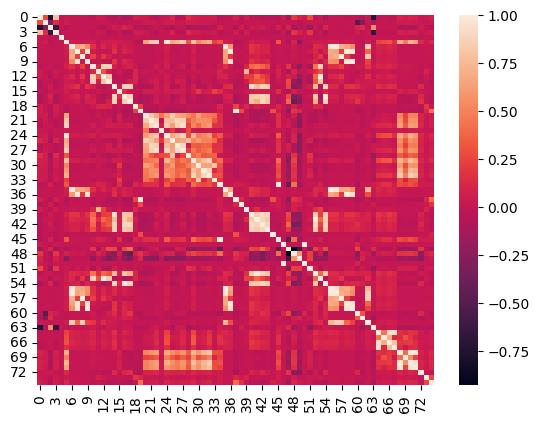

In [ ]:
sns.heatmap(scaled_data.corr())

## When applying PCA to a dataset, one golden rule always exists , Select the best number of principal components while keeping as much of the variance in the original data as possible.

Method 3: Plot the explained variance percentage of individual components and the percentage of total variance captured by all principal components.
This is the most advanced and effective method that can be used to select the best number of principal components for the dataset.

In this method, we create the following type of plot.

In this method, we create the following type of plot.


The percentage of total variance captured by the principal components (Image by author)
The number of bars is equal to the number of variables in the original dataset. In this plot, each bar shows the explained variance percentage of individual components and the step plot shows the cumulative explained variance percentages.

By looking at this plot, we can easily decide how many components should be kept. In this example, only the first two components capture almost all the variance in the dataset. So, we decide to select only the first two components.

To get the Python code for creating the above type of plot, please refer to the 15th Question of my “Principal Component Analysis — 18 Questions Answered” article.

According to Kaiser’s rule, all the components with eigenvalues greater than 1 should be kept for statistical inference. The reasoning behind Kaiser’s rule is that any principal component retained should explain the variance at least as much as an original standardized variable. 

In [ ]:
## Select the ideal number of componnets
import numpy as np

pca = PCA(n_components=18)
 
pca.fit_transform(scaled_data)

prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

print("variance in %",(prop_var*100))
print("Sum is",np.sum(prop_var))
print("type", type(prop_var))
print("eigenvalues",eigenvalues)

eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)
print(prop_var*100)
print(np.sum(prop_var))
                             
                                


variance in % [15.06047335 12.84287048  9.81121216  5.65893085  5.14207855  4.44379074
  3.73212668  3.54955481  3.15766697  2.69457516  2.4195807   2.32964982
  2.29422691  2.09654771  2.06481789  1.70578649  1.47038713  1.45110608]
Sum is 0.8192538248659719
type <class 'numpy.ndarray'>
eigenvalues [11.29538054  9.63217463  7.35842575  4.24420773  3.85656763  3.33285059
  2.79910134  2.66217212  2.36825558  2.02093594  1.81468963  1.74724132
  1.72067407  1.57241434  1.54861692  1.27934276  1.10279284  1.08833202]
[18.38315904 15.67630213 11.97579048  6.90742072  6.27653896  5.42419286
  4.55551939  4.33266797  3.85432069  3.28906022  2.95339567  2.84362398
  2.80038597  2.5590942   2.52036406  2.08212209  1.79478824  1.77125335]
1.0000000000000002


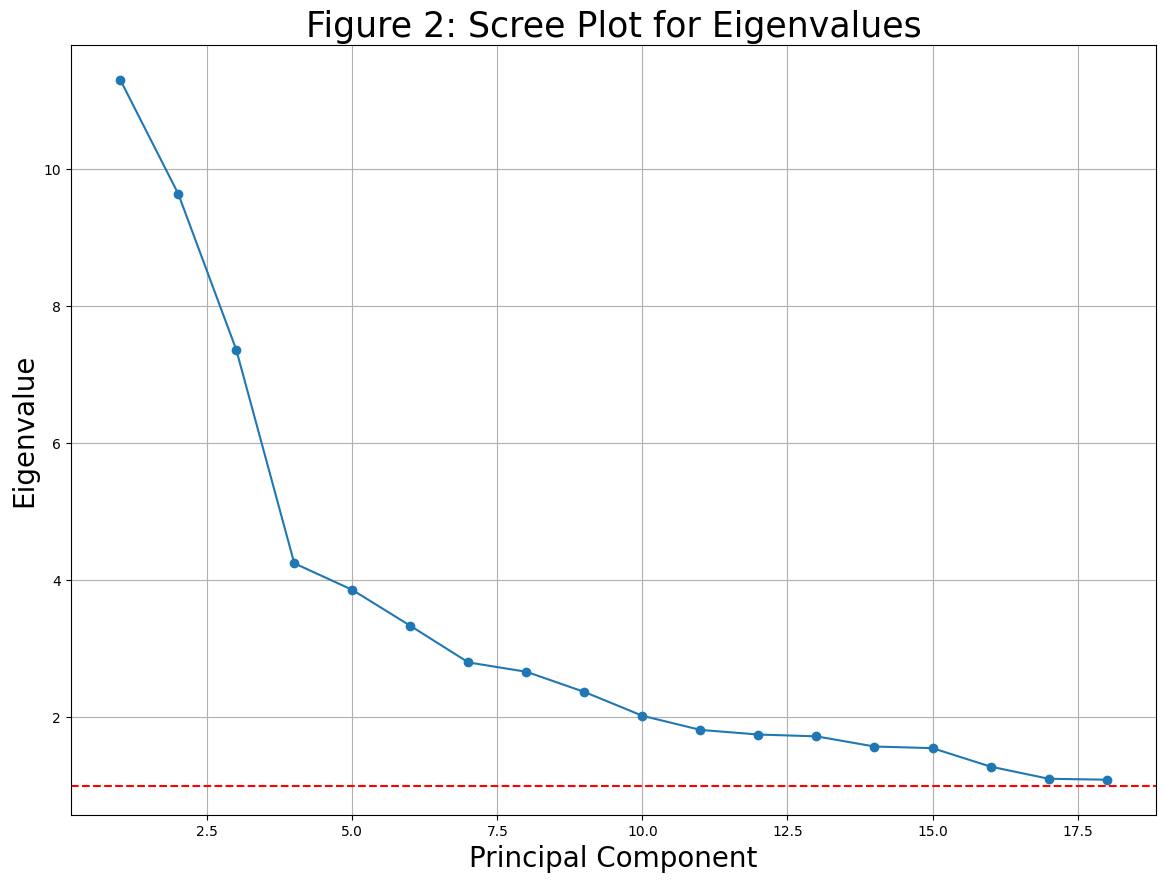

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.plot(np.arange(1, len(eigenvalues)+1), 
         eigenvalues, marker='o')
plt.xlabel('Principal Component',
           size = 20)
plt.ylabel('Eigenvalue',
           size = 20)
plt.title('Figure 2: Scree Plot for Eigenvalues',
          size = 25)
plt.axhline(y=1, color='r', 
            linestyle='--')
plt.grid(True)

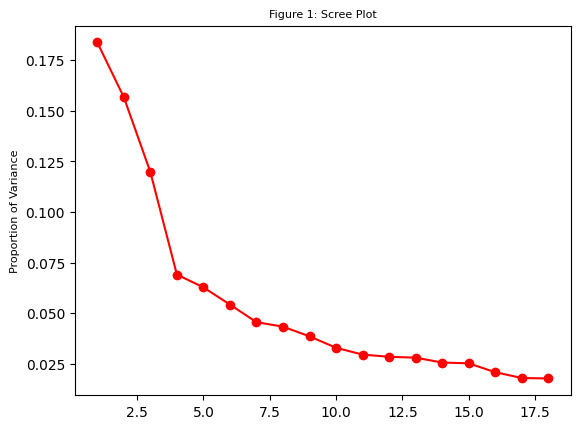

In [ ]:
## 18 have eigen value greater than 1 and covers variance.  We will choose 18 as the ideal number of Principal components for our Analysis
import matplotlib.pyplot as plt
import plotly.graph_objects as go
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [ ]:
# We choose 18 components and do the PCA on them
pca = PCA(n_components = 18)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-1.901801,0.199577,-0.548426,0.858537,0.194401,1.206950,0.287571,0.974503,0.112639,-0.242996,-0.531129,0.544369,0.594968,-0.045580,1.335596,0.268837,0.127980,0.166719
1,-1.738461,-0.019706,0.186337,-2.930940,0.539965,0.924812,-1.496310,0.557451,-0.456069,-0.084806,-0.637566,0.326814,-0.271925,-0.835175,-0.710290,-0.317578,0.035988,0.051833
2,-1.858123,0.670166,-0.948411,0.716741,0.234975,1.306477,0.233337,0.965260,0.127356,-0.229702,-0.662387,0.741392,0.714375,-0.155865,1.775476,0.556950,0.065031,0.176280
3,-1.859435,0.716698,-1.008180,0.822365,0.210747,1.316204,0.290962,0.960416,0.133067,-0.229381,-0.661423,0.749751,0.738317,-0.152933,1.845332,0.583296,0.053373,0.173707
4,-2.008488,-1.663799,1.523387,-0.047451,-2.097718,-0.020470,0.174919,-1.262896,3.749655,-0.008893,-0.449780,0.742216,-0.269265,-0.203185,0.056727,-0.501536,-0.590131,-0.959487


<Axes: >

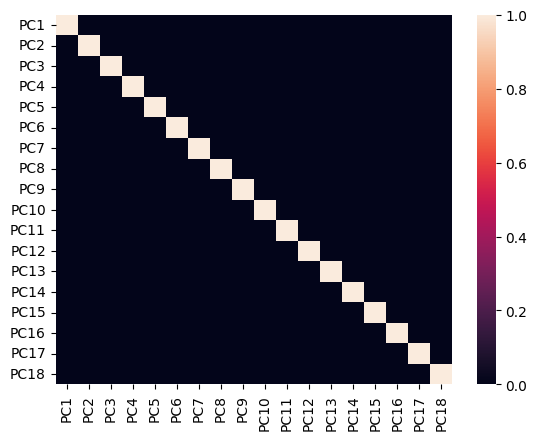

In [ ]:
sns.heatmap(data_pca.corr())

In [ ]:
x = data_pca.iloc[:,0:17] # 1t for rows and second for columns
x


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.901801,0.199577,-0.548426,0.858537,0.194401,1.206950,0.287571,0.974503,0.112639,-0.242996,-0.531129,0.544369,0.594968,-0.045580,1.335596,0.268837,0.127980
1,-1.738461,-0.019706,0.186337,-2.930940,0.539965,0.924812,-1.496310,0.557451,-0.456069,-0.084806,-0.637566,0.326814,-0.271925,-0.835175,-0.710290,-0.317578,0.035988
2,-1.858123,0.670166,-0.948411,0.716741,0.234975,1.306477,0.233337,0.965260,0.127356,-0.229702,-0.662387,0.741392,0.714375,-0.155865,1.775476,0.556950,0.065031
3,-1.859435,0.716698,-1.008180,0.822365,0.210747,1.316204,0.290962,0.960416,0.133067,-0.229381,-0.661423,0.749751,0.738317,-0.152933,1.845332,0.583296,0.053373
4,-2.008488,-1.663799,1.523387,-0.047451,-2.097718,-0.020470,0.174919,-1.262896,3.749655,-0.008893,-0.449780,0.742216,-0.269265,-0.203185,0.056727,-0.501536,-0.590131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,3.932527,0.312532,-0.074227,-2.709714,-0.328696,-1.202835,-0.937012,-0.107361,-0.882736,0.017881,-1.069318,-1.550408,-1.406815,1.385753,-3.254731,-1.041034,-0.931598
442479,0.286940,0.121249,-0.145474,-1.778676,1.330982,-0.034266,-1.129681,-0.280500,0.277870,-0.203175,0.656919,-1.658570,-0.145434,0.004383,-2.628855,-0.497501,0.515170
442480,0.608970,0.069584,-0.235357,-1.664443,1.699704,0.133325,-1.178856,-0.275779,0.419547,-0.272781,0.893919,-1.653021,0.126305,-0.152403,-2.646027,-0.624383,0.388650
442481,0.470771,0.444487,-0.494916,-1.760124,1.413074,0.168052,-1.173820,-0.302655,0.271364,-0.276379,0.800139,-1.721955,0.113310,-0.045074,-2.770753,-0.561035,0.432862


## We will Use the Following method to determine the ideal K for the  K-means algorithm
Silhouette Coefficient measures the between-cluster distance against within-cluster distance. A higher score signifies better-defined clusters.

The Silhouette Coefficient of a sample measures the average distance of a sample with all other points in the next nearest cluster against all other points in its cluster. A higher ratio signifies the cluster is far away from its nearest cluster and that the cluster is more well-defined.


Calinski-Harabasz Index
Calinski-Harabasz Index measures the between-cluster dispersion against within-cluster dispersion. A higher score signifies better-defined clusters.

The Calinski-Harabasz Index, or Variance Ratio Criterion, measures the sum of between-cluster dispersion against the sum of within-cluster dispersion, where dispersion is the sum of distance squared.

A higher ratio signifies the cluster is far away from its other clusters and that the cluster is more well-defined. 




Davies-Bouldin Index
Davies-Bouldin Index measures the size of clusters against the average distance between clusters. A lower score signifies better-defined clusters.

The Davies-Bouldin Index measures the average similarity between clusters, where similarity compares the size of clusters against the between-cluster distance.

A lower score means that the cluster is relatively small compared to the distance to another cluster, hence well-defined.

In [ ]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(x)
    sum_of_squared_distances.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

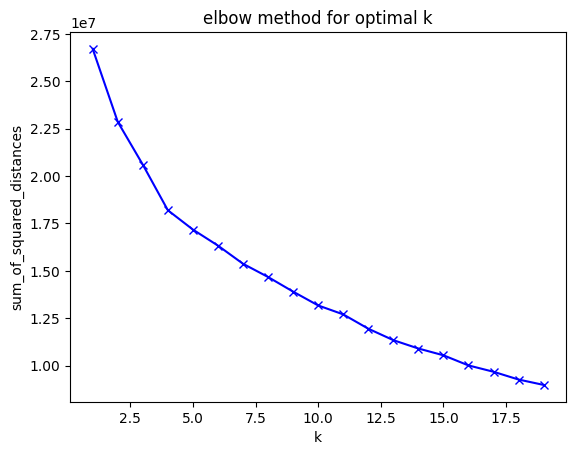

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

# Check the ideal K
We will Use K values from 4 to 9 to get the ideal value of K in this algorithm

In [ ]:
# 4 and 5, 6 7, 8
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
X=x
k_means_4 = KMeans(n_clusters=4)
model = k_means_4.fit(X)
y_hat_4 = k_means_4.predict(X)
labels_4 = k_means_4.labels_
print(metrics.silhouette_score(X, labels_4, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_4))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_4)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.34784977746028906
69008.36566999486
1.328646050384773


In [ ]:
type(X)

pandas.core.frame.DataFrame

[1 1 1 ... 1 1 1]


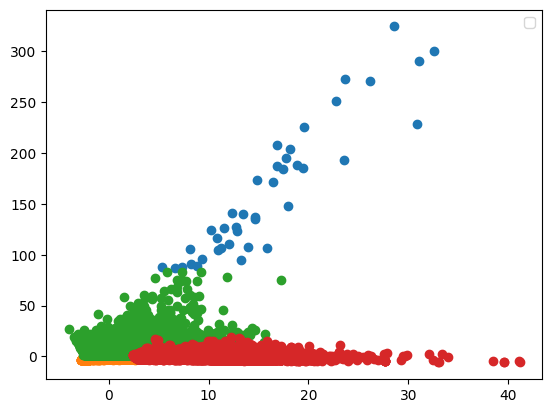

In [ ]:
kmeans_label = y_hat_4
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
X=x
k_means_5 = KMeans(n_clusters=5)
model = k_means_5.fit(X)
y_hat_5 = k_means_5.predict(X)
labels_5 = k_means_5.labels_
print(metrics.silhouette_score(X, labels_5, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_5))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_5)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.16870801859128887
61257.417787438615
1.4899816110686466


[4 4 4 ... 1 1 1]


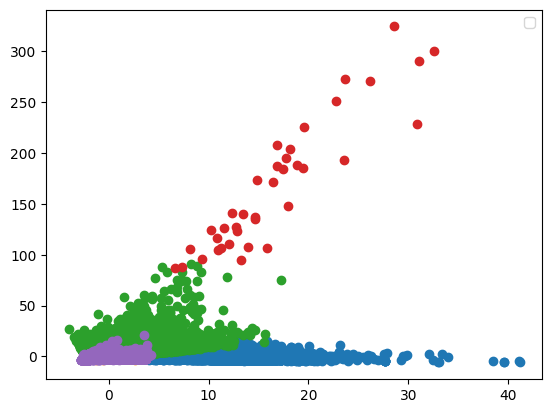

In [ ]:
kmeans_label = y_hat_5
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
X=x
k_means_6 = KMeans(n_clusters=6)
model = k_means_6.fit(X)
y_hat_6 = k_means_6.predict(X)
labels_6 = k_means_6.labels_
print(metrics.silhouette_score(X, labels_6, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_6))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_6)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.18464294960820013
57607.75094997184
1.528185873412539


[0 0 0 ... 2 2 2]


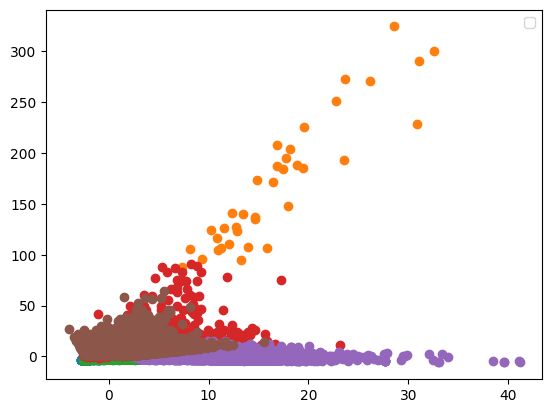

In [ ]:
kmeans_label = y_hat_6
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
X=x
k_means_7 = KMeans(n_clusters=7)
model = k_means_7.fit(X)
y_hat_7 = k_means_7.predict(X)
labels_7 = k_means_7.labels_
print(metrics.silhouette_score(X, labels_7, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_7))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_7)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.1953352860500601
54408.34263718038
1.4112270620765217


[4 4 4 ... 2 2 2]


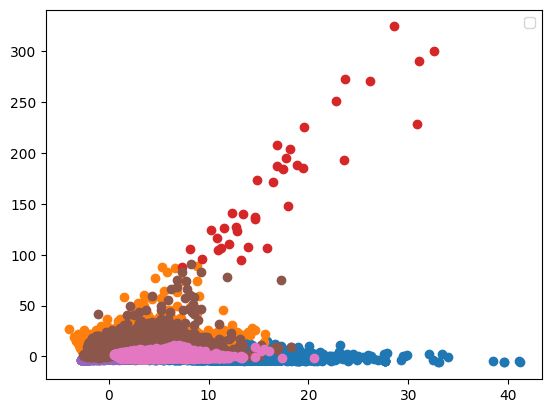

In [ ]:
kmeans_label = y_hat_7
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
X=x
k_means_8 = KMeans(n_clusters=8)
model = k_means_8.fit(X)
y_hat_8 = k_means_8.predict(X)
labels_8 = k_means_8.labels_
print(metrics.silhouette_score(X, labels_8, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_8))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_8)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.1988500421789216
52612.01326473616
1.4010219679355973


[4 4 4 ... 1 1 1]


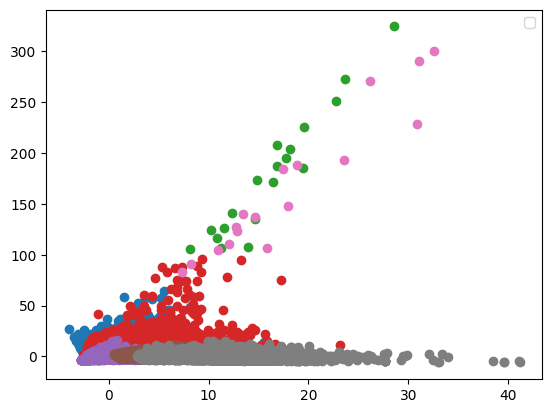

In [ ]:
kmeans_label = y_hat_8
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
X=x
k_means_9 = KMeans(n_clusters=9)
model = k_means_9.fit(X)
y_hat_9 = k_means_9.predict(X)
labels_9 = k_means_9.labels_
print(metrics.silhouette_score(X, labels_9, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_9))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X, labels_9)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.18052985825025916
1.3716559546421976


[3 3 3 ... 8 8 8]


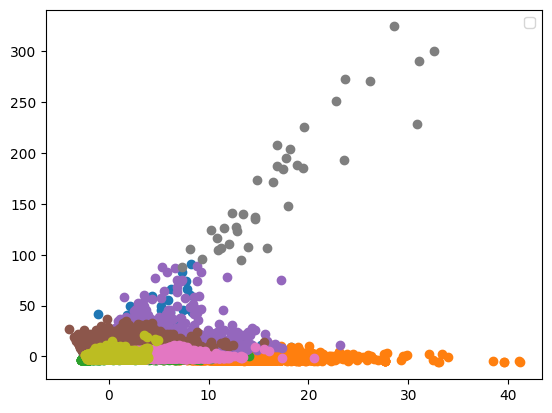

In [ ]:
kmeans_label = y_hat_9
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

Beyond 9 , the score becomes bad.

In [ ]:
k_means_13 = KMeans(n_clusters=13)
model = k_means_13.fit(X)
y_hat_13 = k_means_13.predict(X)
labels_13 = k_means_13.labels_
print(metrics.silhouette_score(X, labels_13, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_13))

DB = davies_bouldin_score(X, labels_13)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.20484130811948517
1.27358306309534


[5 5 5 ... 0 0 0]


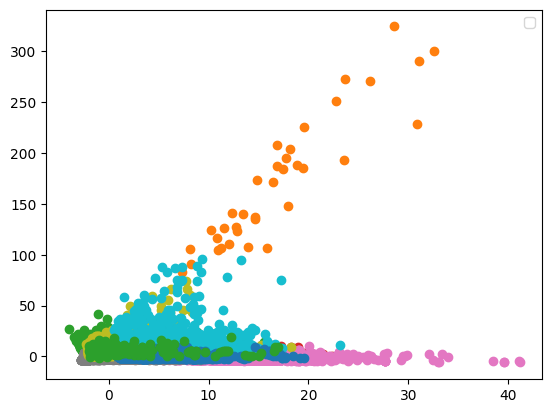

In [ ]:
kmeans_label = y_hat_13
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
k_means_18 = KMeans(n_clusters=18)
model = k_means_18.fit(X)
y_hat_18 = k_means_18.predict(X)
labels_18 = k_means_18.labels_
print(metrics.silhouette_score(X, labels_18, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_18))

DB = davies_bouldin_score(X, labels_18)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.21162316623384214
1.192316695053014


[6 6 6 ... 1 1 1]


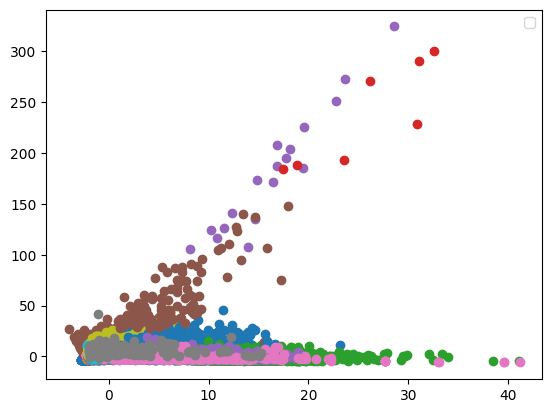

In [ ]:
kmeans_label = y_hat_18
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
k_means_23 = KMeans(n_clusters=23)
model = k_means_23.fit(X)
y_hat_23 = k_means_23.predict(X)
labels_23 = k_means_23.labels_
print(metrics.silhouette_score(X, labels_23, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels_23))

DB = davies_bouldin_score(X, labels_23)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.23116738164392664
46994.12919981343
1.1056972583861264


[3 7 3 ... 9 7 9]


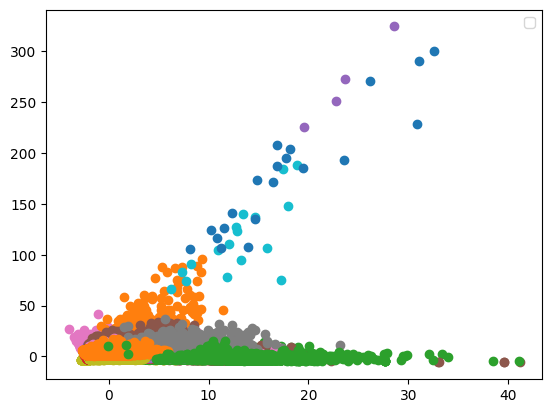

In [ ]:
kmeans_label = y_hat_23
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

K Means Cluster Analysis

## For the Overall Data

## Lets analyze the top 10 flows by applications 


## Lets analyze the top 10 flows by volume (Flow.Duration in Seconds * Flow bytes per second)


## Lets analyze the top 10 clients by session (Check which clients are chatty)

## Top 10 Clients per Volume (Check which applications are chatty)


## Same analysis per Clusters

## Final Analysis - Which parameters are most important for clustering
## Is the Clusters can be associated to a QOS
## Can the clusters be used for DPI tool
## Can the Clusters be used for Resource Allocation in Hardware
## Is the solution seamless for Encrypted Traffic
## Is the solution seamless for Encapsulated/DCN/Campus networks








In [ ]:
print("4 is the Ideal Cluster number")
import collections, numpy
overall_counter = collections.Counter(y_hat_4)

## Check How the Clusters are divided 
print(overall_counter)

4 is the Ideal Cluster number
Counter({1: 316321, 3: 65107, 2: 61014, 0: 41})


In [ ]:
## Analysis
 
print("Cluster Distribution")

print("cluster 0 % elements",317254*100/len(mydata))
print("cluster 1 % elements",64309*100/len(mydata))
print("cluster 2 % elements",60879*100/len(mydata))
print("cluster 3 % elements",41*100/len(mydata))

Cluster Distribution
cluster 0 % elements 71.6985737305162
cluster 1 % elements 14.533665700151193
cluster 2 % elements 13.758494676631644
cluster 3 % elements 0.009265892700962524


First 3 clusters only explains all the variations. We will treat Cluster 3 as Outliers and check what exactly it has
Before that Some analysis on the Original Data Set only.
Note that we have merged the Dataset based on Flow ID. Thereby multiple rows are merged to one

In [ ]:
## Top Sessions by L7 Protocol
print("Sessions by L7 Protocol")
overall_data_countrer_l7 = collections.Counter(mydata['L7Protocol'])
print(overall_data_countrer_l7)

Sessions by L7 Protocol
Counter({126.0: 105340, 91.0: 67033, 7.0: 58771, 131.0: 44478, 130.0: 25315, 124.0: 21629, 212.0: 10882, 178.0: 8399, 68.5: 8283, 69.0: 6217, 66.5: 6090, 147.0: 5727, 37.75: 4668, 70.0: 3688, 125.0: 3572, 38.0: 3099, 119.0: 3037, 36.75: 2975, 122.0: 2930, 120.0: 2494, 68.0: 2423, 220.0: 2256, 65.5: 1846, 48.0: 1763, 86.33333333333333: 1678, 121.0: 1674, 89.0: 1660, 48.333333333333336: 1481, 78.4: 1481, 46.666666666666664: 1409, 109.5: 1112, 40.0: 1021, 140.0: 964, 36.25: 958, 89.66666666666667: 919, 96.25: 783, 77.0: 773, 56.2: 744, 219.0: 725, 211.0: 614, 80.8: 613, 54.6: 608, 53.666666666666664: 582, 38.5: 558, 99.25: 532, 221.0: 447, 139.0: 412, 58.25: 408, 31.6: 399, 100.0: 369, 42.0: 355, 46.0: 354, 64.0: 344, 133.0: 344, 56.6: 339, 85.0: 335, 142.0: 333, 102.2: 321, 22.75: 307, 75.33333333333333: 306, 176.0: 290, 128.5: 283, 77.28571428571429: 279, 81.4: 277, 58.0: 258, 143.0: 253, 66.0: 253, 92.5: 248, 75.0: 227, 92.0: 216, 179.0: 210, 63.5: 206, 136.3333

In [ ]:
## Top Entries by Client IP
print("Session entries by Source IP")
overall_data_countrer_sip = collections.Counter(mydata['Source.IP'])
print(overall_data_countrer_sip)

Session entries by Source IP
Counter({180881369.0: 44674, 180881351.0: 39480, 180881347.0: 38069, 180881370.0: 37477, 180881346.0: 36596, 180881348.0: 33349, 180881159.0: 5086, 3232281614.0: 4465, 3232254040.0: 3361, 180881157.0: 3014, 3232258674.0: 2722, 3232258625.0: 2572, 3232253995.0: 2571, 3232238145.0: 2244, 3232281637.0: 2045, 180881160.0: 1967, 180881161.0: 1866, 3232253983.0: 1601, 3232245798.0: 1521, 3232238117.0: 1518, 180881158.0: 1500, 180881156.0: 1499, 2886926637.0: 1454, 3232281616.0: 1436, 2886926628.0: 1413, 3232238160.0: 1407, 2886926622.0: 1310, 3232254003.0: 1279, 3232238119.0: 1257, 3232274184.0: 1248, 182845752.0: 1182, 3232245802.0: 1170, 3232264206.0: 1140, 182845769.0: 1131, 3232281652.0: 1097, 3232268841.0: 1091, 3232246385.0: 1086, 3232258570.0: 1075, 3232274185.0: 1037, 3232256281.0: 1012, 3232258698.0: 971, 2886926627.0: 927, 3232245790.0: 926, 3232242985.0: 922, 3232268802.0: 903, 3232258590.0: 887, 3232248858.0: 872, 3232269075.0: 857, 3232246334.0: 857,

In [ ]:
# Top Entries my Destination IP
print("Session entries by Destination IP")
overall_data_countrer_dip = collections.Counter(mydata['Destination.IP'])
print(overall_data_countrer_dip)

Session entries by Destination IP
Counter({180881160.0: 35746, 180881157.0: 35205, 180881159.0: 34224, 180881156.0: 32976, 180881161.0: 31759, 180881158.0: 27756, 3488895158.0: 8282, 3003188434.0: 5374, 1750834412.0: 5358, 3003188455.0: 5070, 3003188468.0: 5049, 3003188440.0: 5016, 3003188461.0: 4850, 3003188454.0: 4820, 3003188441.0: 4770, 3003188475.0: 4743, 3003188469.0: 4701, 3003188462.0: 4673, 3003188448.0: 4544, 3003188447.0: 4537, 3232281637.0: 2757, 2899909953.0: 1837, 3627731682.0: 1648, 3627731681.0: 1561, 2899910146.0: 1466, 643490315.0: 1382, 3627736642.0: 1255, 2899910145.0: 1240, 225117234.0: 1223, 2899909922.0: 1204, 1089059517.0: 1113, 169084084.0: 1082, 643490316.0: 1069, 3589263173.0: 1065, 3627736674.0: 1015, 2899909954.0: 991, 225126923.0: 957, 643490317.0: 955, 3232274178.0: 947, 3232291845.0: 942, 1089060541.0: 932, 3627736673.0: 912, 1611073902.0: 865, 386478863.0: 833, 3627731690.0: 822, 2899910154.0: 743, 1168955503.0: 713, 3627736641.0: 672, 392336990.0: 640,

Create additional column for Volume in Bytes and Packets. These are useful as most sampled solutions provide this data

In [ ]:
## Get volume in the mydata. Volume in bytes = Duration in millisecod*bytes per seconds/100

mydata['volume_in_bytes_psec'] = mydata['Flow.Duration']*mydata['Flow.Bytes.s']/1000 
print(mydata['volume_in_bytes_psec'])
mydata['volume_in_packets_psec'] = mydata['Flow.Duration']*mydata['Flow.Packets.s']/1000 
print(mydata['volume_in_packets_psec'])
## Create Two Data Frames from the Original , one sorted with bytes and one sorted with packets

sorted_data_bytes = mydata.sort_values(by=['volume_in_bytes_psec'], ascending=False)
print(sorted_data_bytes)

sorted_data_packets = mydata.sort_values(by=['volume_in_packets_psec'], ascending=False)

0         2.337000e+06
1         1.398000e+06
2         3.892000e+06
3         3.475000e+06
4         1.774782e+07
              ...     
442478    2.084781e+07
442479    5.817757e+06
442480    2.718756e+06
442481    4.525014e+06
442482    1.321753e+06
Name: volume_in_bytes_psec, Length: 442483, dtype: float64
0         1.000000e+04
1         4.000000e+03
2         1.200000e+04
3         1.100000e+04
4         2.888500e+06
              ...     
442478    3.459495e+08
442479    8.317277e+08
442480    4.411331e+08
442481    3.310524e+08
442482    4.907189e+08
Name: volume_in_packets_psec, Length: 442483, dtype: float64
           Source.IP  Source.Port  Destination.IP  Destination.Port  Protocol  \
226160  3.232238e+09      51405.0    1.808812e+08            3128.0       6.0   
407778  1.808814e+08      55779.0    3.246174e+09              80.0       6.0   
437476  1.808814e+08      44592.0    3.627737e+09              80.0       6.0   
237997  3.232238e+09      52138.0    1.808812e+08 

In [ ]:
## Lets see the Top 10 guys based on Volume as to which App they belong

## Top 10 by Packets
print(sorted_data_packets[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].head(10))
## In the Top 10 results L4 Protocols and Destination Ports are typically same , we can remove one of them.  What impacts most , 
## Is there a particular client which is chatty or a particular application. 

## Top 10 entries by Volume in packets has mostly sent to Application 126 and 125 which are skype and google. Although SSL packets themselves was the
## highest

           Source.IP  Destination.IP  L7Protocol  Destination.Port  \
108436  1.808814e+08    2.539996e+09        91.0             443.0   
379928  3.232256e+09    1.808812e+08       125.0            3128.0   
266427  3.232272e+09    1.808812e+08       126.0            3128.0   
267507  3.232272e+09    1.808812e+08        77.0            3128.0   
97574   1.828459e+08    1.808812e+08       126.0            3128.0   
97577   1.828459e+08    1.808812e+08       126.0            3128.0   
97576   1.828459e+08    1.808812e+08       126.0            3128.0   
97575   1.828459e+08    1.808812e+08       126.0            3128.0   
97624   1.828459e+08    1.808812e+08       126.0            3128.0   
90284   1.808814e+08    1.541711e+09         7.0              80.0   

        volume_in_bytes_psec  Flow.Duration  
108436          1.930394e+12     39395801.0  
379928          1.290305e+13     59461046.5  
266427          5.273181e+11     58590596.5  
267507          5.147806e+11     42895491.5  

In [ ]:
sorted_data_duration = mydata.sort_values(by=['Flow.Duration'], ascending=False)
print(sorted_data_duration[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].head(20))
## Top 10 by Duration does not have 131 (Proxy), which means they are generally small duration. Large duration session were 126
## 211- Instagra 212- MS, 125- Skype , MSN


           Source.IP  Destination.IP  L7Protocol  Destination.Port  \
203225  1.808813e+08    3.003188e+09       126.0             443.0   
218528  1.808814e+08    3.193634e+09       211.0             443.0   
183313  1.808813e+08    3.003188e+09       126.0             443.0   
97584   1.828459e+08    1.808812e+08       126.0            3128.0   
337178  3.232246e+09    1.808812e+08        68.0            3128.0   
97925   1.828458e+08    1.808812e+08         7.0            3128.0   
17520   1.808813e+08    1.758470e+09       212.0             443.0   
309256  3.232244e+09    1.808812e+08       212.0            3128.0   
241279  3.232238e+09    1.808812e+08       126.0            3128.0   
20316   1.808813e+08    2.251171e+08       125.0             443.0   
280276  3.232282e+09    1.808812e+08       126.0            3128.0   
382661  3.232256e+09    1.808812e+08       126.0            3128.0   
93852   1.828459e+08    1.808812e+08       131.0            3128.0   
362566  3.232254e+09

Next we will take only a subset of parameters that we think is important and do K-Means based on them and check whether the results are similar

## This will be done in later part of analysis once base results are obtained with the original Data



In [ ]:

newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()
#newmydata_packets = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_packets_psec','Flow.Duration']].copy()

We see the following patterns in the Original Dataframe
There are large size packets in a session
There are large duration sessions
There are small duration sessions
There are small size packets in a session
There are different applications - Video (Youtube , Skype , Google, MSN etc)
One client is more chatty then others.
Some client might be using some applications


Clusters Analyzed will be K-Means only. We would see in the 4 Clusters on what parameters that clusters are formed by comparing two clusters. 


In the second experiment , we will create the K-means without PCA and with only the 5-6 Columns and see the patterns in the Cluster.  This can be repeated with one or two more but we would conclude.


Optional - Hierarchical clsuters can be tried to see if the same pattern exist in the Clusters.

Fuzzy C Means will be experimented for the similar excercise to see if the results are same as till now very less results available for Fuzzy C-Means for IP FLow Classification



Recommendation will be based on the Results obtained with some domain knowledge added to it. 



In [ ]:
mydata['pLabel'] = y_hat_4

label0_df_kmeans = mydata.loc[mydata['pLabel'] == 0]
label0_df_kmeans

label1_df_kmeans = mydata.loc[mydata['pLabel'] == 1]
label1_df_kmeans

label2_df_kmeans = mydata.loc[mydata['pLabel'] == 2]
label2_df_kmeans

label3_df_kmeans = mydata.loc[mydata['pLabel'] == 3]
label3_df_kmeans




print(len(label0_df_kmeans))
print(len(label1_df_kmeans))
print(len(label2_df_kmeans))
print(len(label3_df_kmeans))

41
316321
61014
65107


## Calculation of weights of each column in the Cluster

THis will be repeated for all Clusters

This approach is model-agnostic; Not exclusive to K-Means, in which we convert the unsupervised clustering problem into a One-vs-All supervised classification problem using an easily interpretable classifier such as tree-based models. The steps to do this are as follows:

Change the cluster labels into One-vs-All binary labels for each
Train a classifier to discriminate between each cluster and all other clusters
Extract the feature importances from the model (We will be using sklearn.ensemble.RandomForestClassifier)

In [ ]:
mydata['pLabel']
mydata['Binary Cluster 0'] = mydata['pLabel'].map({0:0, 1:0, 2:1,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)



# Show
print(list(zip(most_important_features, most_important_weights)))





 0    381469
1     61014
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Packet.Length.Std', 0.15379928928769557),
 ('Max.Packet.Length', 0.1337974344526941),
 ('Packet.Length.Variance', 0.11508440794305733),
 ('Bwd.Packet.Length.Mean', 0.08397548722277347),
 ('Avg.Bwd.Segment.Size', 0.0799275686192369),
 ('Bwd.Packet.Length.Max', 0.06628283883791838),
 ('Packet.Length.Mean', 0.05410511611361845),
 ('Average.Packet.Size', 0.051502131915278755),
 ('Bwd.Packet.Length.Std', 0.04004868453854034),
 ('Total.Length.of.Bwd.Packets', 0.017514616743204283),
 ('Total.Fwd.Packets', 0.013010600163561658),
 ('Subflow.Bwd.Bytes', 0.010012750876700146),
 ('Avg.Fwd.Segment.Size', 0.008932861354470295),
 ('Fwd.Packet.Length.Max', 0.007037300203200936),
 ('Fwd.Packet.Length.Mean', 0.007026593312684703),
 ('Subflow.Bwd.Packets', 0.006487482747322654),
 ('Idle.Mean', 0.0064416573770527405),
 ('Idle.Max', 0.0062226230687712205),
 ('Fwd.Packets.s', 0.004974528640431661),
 ('Fwd.Header.Length.1', 0.00490352662238041),
 ('Bwd.IAT.Max', 0.004886385676045091),
 ('Fwd.Packet.Length

In [ ]:
## We will repeat this procedure for all the Clusters. Cluster 1

mydata['Binary Cluster 0'] = mydata['pLabel'].map({0:1, 1:0, 2:0,3:0})
print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    442442
1        41
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Subflow.Bwd.Packets', 0.1284370507100553),
 ('Fwd.Header.Length.1', 0.11829198885838756),
 ('Bwd.Header.Length', 0.10459682222670946),
 ('Fwd.Header.Length', 0.09494790415318294),
 ('Total.Fwd.Packets', 0.09432413197049887),
 ('Subflow.Fwd.Packets', 0.09108018808360113),
 ('Total.Backward.Packets', 0.06602370246828893),
 ('Total.Length.of.Bwd.Packets', 0.05479652675980994),
 ('Subflow.Bwd.Bytes', 0.05054126854286985),
 ('Subflow.Fwd.Bytes', 0.041927761426121125),
 ('act_data_pkt_fwd', 0.028116223290860307),
 ('Total.Length.of.Fwd.Packets', 0.02139600345185673),
 ('volume_in_bytes_psec', 0.0092595487603529),
 ('volume_in_packets_psec', 0.006831680969330317),
 ('Flow.Duration', 0.005743101162462506),
 ('Fwd.IAT.Mean', 0.005426938766239219),
 ('Avg.Fwd.Segment.Size', 0.004864415195058021),
 ('Fwd.Packets.s', 0.004385351624998516),
 ('Fwd.Packet.Length.Max', 0.004081697448759258),
 ('Flow.Packets.s', 0.004050403805558795),
 ('Flow.IAT.Max', 0.00358236689623733),
 ('Flow.Bytes.s', 0.0034

In [ ]:
## Cluster 2
mydata['Binary Cluster 0'] = mydata['pLabel'].map({0:0, 1:1, 2:0,3:0})
print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 1    316321
0    126162
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Flow.Duration', 0.1004768825124559),
 ('Packet.Length.Std', 0.09793475822622771),
 ('Fwd.IAT.Total', 0.09257847171852321),
 ('Max.Packet.Length', 0.07607553140711078),
 ('Packet.Length.Variance', 0.050197168454593204),
 ('Idle.Max', 0.0495771263302449),
 ('Average.Packet.Size', 0.043430493600944434),
 ('Bwd.Packet.Length.Mean', 0.03989302908193045),
 ('Idle.Mean', 0.039397134012352515),
 ('Bwd.Packet.Length.Max', 0.036345745558084556),
 ('Flow.IAT.Max', 0.036143522786387626),
 ('Bwd.IAT.Total', 0.026993538206479623),
 ('Packet.Length.Mean', 0.023710106789277246),
 ('Avg.Bwd.Segment.Size', 0.021110940520298667),
 ('Fwd.IAT.Max', 0.02010207117671809),
 ('Bwd.Packet.Length.Std', 0.018287508620997213),
 ('Flow.IAT.Mean', 0.01698006423320243),
 ('Flow.IAT.Std', 0.01693310718843237),
 ('Bwd.IAT.Max', 0.01170834468416437),
 ('Fwd.IAT.Mean', 0.010934261344192382),
 ('Total.Length.of.Bwd.Packets', 0.010731445920557263),
 ('Fwd.IAT.Std', 0.010201440579298256),
 ('Idle.Min', 0.0097923528061141

In [ ]:
## Cluster 3
mydata['Binary Cluster 0'] = mydata['pLabel'].map({0:0, 1:0, 2:0,3:1})
print("\n", mydata["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(mydata.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(mydata[mylist].values, mydata["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    377376
1     65107
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Flow.Duration', 0.12290507547773494),
 ('Fwd.IAT.Total', 0.12225116351015156),
 ('Flow.IAT.Max', 0.07565771375959561),
 ('Idle.Max', 0.07252497859158864),
 ('Idle.Mean', 0.07119196651631568),
 ('Fwd.IAT.Mean', 0.0559275342177187),
 ('Flow.IAT.Std', 0.05204011488425031),
 ('Flow.IAT.Mean', 0.046102823036889555),
 ('Bwd.IAT.Std', 0.03658762360940012),
 ('Bwd.IAT.Mean', 0.03395556551947213),
 ('Bwd.IAT.Total', 0.03201852664451966),
 ('Idle.Min', 0.03026394857507905),
 ('Fwd.IAT.Std', 0.03017930056862072),
 ('Fwd.IAT.Max', 0.02816992170128579),
 ('Bwd.IAT.Max', 0.02194033091458367),
 ('Active.Max', 0.01734100646681601),
 ('Flow.Packets.s', 0.013802060797809271),
 ('Fwd.Packets.s', 0.013130687863406546),
 ('Active.Std', 0.012410841276437762),
 ('Idle.Std', 0.008683747483645652),
 ('Packet.Length.Mean', 0.0077976090529554955),
 ('Active.Mean', 0.005519791675639528),
 ('Max.Packet.Length', 0.005515512590108347),
 ('Active.Min', 0.005434557556417066),
 ('Packet.Length.Variance', 0.004526342

In [ ]:
#Lets do K-means on reduced datasets

newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()


In [ ]:
## Use Standard Scaler to Scale the Data
newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(newmydata_bytes)) #scaling the data
scaled_data

,0,1,2,3,4,5,6
0,-0.864318,-0.888809,0.638001,0.908762,-0.051726,-0.154444,-0.615518
1,-0.864318,-0.888809,-1.895416,0.908762,-0.051733,-0.154446,-0.615820
2,-0.864318,-0.888809,2.292895,0.908762,-0.051715,-0.154443,-0.615924
3,-0.864318,-0.888809,2.435910,0.908762,-0.051718,-0.154443,-0.615896
4,-0.864318,-0.888809,0.270247,0.908762,-0.051613,-0.153553,-0.616006
...,...,...,...,...,...,...,...
442478,-0.861252,-0.921801,-1.895416,-1.005425,-0.051590,-0.047418,1.748831
442479,-0.861252,-0.921801,-1.895416,-1.005425,-0.051701,0.102870,0.622970
442480,-0.861252,-0.921801,-1.895416,-1.005425,-0.051723,-0.017971,0.599234
442481,-0.861252,-0.921801,-1.895416,-1.005425,-0.051710,-0.052027,0.606723


In [ ]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(scaled_data)
    sum_of_squared_distances.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

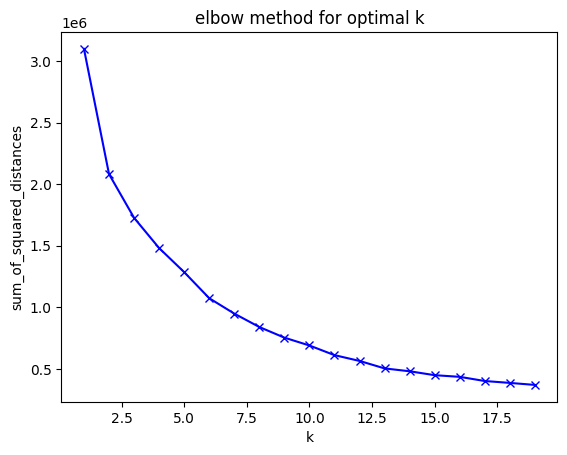

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [ ]:
X1=scaled_data
k_means_4 = KMeans(n_clusters=4)
model = k_means_4.fit(X1)
y_hat_4 = k_means_4.predict(X1)
labels_4 = k_means_4.labels_
print(metrics.silhouette_score(X1, labels_4, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X1, labels_4))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X1, labels_4)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.47277347370062717
160973.6892769405
0.7533749002889661


In [ ]:
X1=scaled_data
k_means_5 = KMeans(n_clusters=5)
model = k_means_5.fit(X1)
y_hat_5 = k_means_5.predict(X1)
labels_5 = k_means_5.labels_
print(metrics.silhouette_score(X1, labels_5, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X1, labels_5))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X1, labels_5)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.47687532983123604
162095.3279888881
0.8608190299851343


In [ ]:
X1=scaled_data
k_means_6 = KMeans(n_clusters=6)
model = k_means_6.fit(X1)
y_hat_6 = k_means_6.predict(X1)
labels_6 = k_means_6.labels_
print(metrics.silhouette_score(X1, labels_6, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X1, labels_6))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X1, labels_6)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.43691622593360624
166682.96074365603
0.8960701915425097


In [ ]:
X1=scaled_data
k_means_7 = KMeans(n_clusters=7)
model = k_means_7.fit(X1)
y_hat_7 = k_means_7.predict(X1)
labels_7 = k_means_7.labels_
print(metrics.silhouette_score(X1, labels_7, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X1, labels_7))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X1, labels_7)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.42869626855266574
166883.8610349177
0.8597847650407078


In [ ]:
X1=scaled_data
k_means_8 = KMeans(n_clusters=8)
model = k_means_8.fit(X1)
y_hat_8 = k_means_8.predict(X1)
labels_8 = k_means_8.labels_
print(metrics.silhouette_score(X1, labels_8, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X1, labels_8))

from sklearn.metrics import davies_bouldin_score
DB = davies_bouldin_score(X1, labels_8)
print(DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.4591505994716161
169772.80123512313
0.8148150492627304


We will use 4 as the ideal cluster size and would evaluate

[0 0 0 ... 1 1 1]


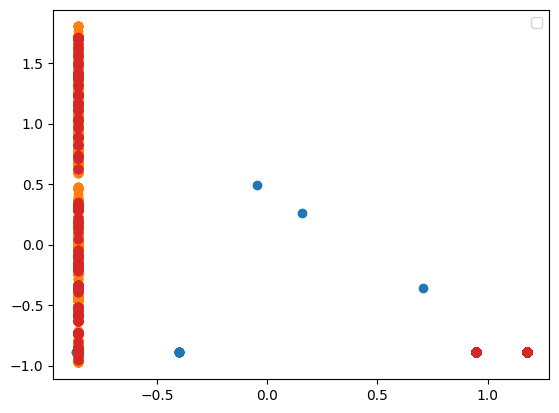

In [ ]:
kmeans_label = y_hat_4
df = X1
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
5#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
print("4 is the Ideal Cluster number")
import collections, numpy
overall_counter = collections.Counter(y_hat_4)

## Check How the Clusters are divided 
print(overall_counter)

4 is the Ideal Cluster number
Counter({1: 240925, 0: 196029, 3: 5501, 2: 28})


In [ ]:
newmydata_bytes
scaled_data

,0,1,2,3,4,5,6
0,-0.864318,-0.888809,0.638001,0.908762,-0.051726,-0.154444,-0.615518
1,-0.864318,-0.888809,-1.895416,0.908762,-0.051733,-0.154446,-0.615820
2,-0.864318,-0.888809,2.292895,0.908762,-0.051715,-0.154443,-0.615924
3,-0.864318,-0.888809,2.435910,0.908762,-0.051718,-0.154443,-0.615896
4,-0.864318,-0.888809,0.270247,0.908762,-0.051613,-0.153553,-0.616006
...,...,...,...,...,...,...,...
442478,-0.861252,-0.921801,-1.895416,-1.005425,-0.051590,-0.047418,1.748831
442479,-0.861252,-0.921801,-1.895416,-1.005425,-0.051701,0.102870,0.622970
442480,-0.861252,-0.921801,-1.895416,-1.005425,-0.051723,-0.017971,0.599234
442481,-0.861252,-0.921801,-1.895416,-1.005425,-0.051710,-0.052027,0.606723


In [ ]:
newmydata_bytes['pLabel'] = y_hat_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['pLabel'].map({0:1, 1:0, 2:0,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    246454
1    196029
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']
[3 1 0 5 2 4 6]
[0.23649102 0.29607138 0.02547296 0.39120575 0.02126216 0.02707389
 0.00242284]


[('Destination.Port', 0.3912057501417804),
 ('Destination.IP', 0.2960713806190614),
 ('Source.IP', 0.23649102088196633),
 ('volume_in_packets_psec', 0.027073893240409187),
 ('L7Protocol', 0.025472959460409925),
 ('volume_in_bytes_psec', 0.021262156876297185),
 ('Flow.Duration', 0.002422838780075503)]

In [ ]:
newmydata_bytes['pLabel'] = y_hat_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['pLabel'].map({0:0, 1:1, 2:0,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 1    240925
0    201558
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']
[3 1 0 2 5 4 6]
[0.2440623  0.30336428 0.02339006 0.39888452 0.01340712 0.01587392
 0.00101778]


[('Destination.Port', 0.39888452230420113),
 ('Destination.IP', 0.3033642841557359),
 ('Source.IP', 0.2440623010948385),
 ('L7Protocol', 0.023390062723801418),
 ('volume_in_packets_psec', 0.015873923283575637),
 ('volume_in_bytes_psec', 0.013407124344860005),
 ('Flow.Duration', 0.0010177820929873824)]

In [ ]:
newmydata_bytes

,Source.IP,Destination.IP,L7Protocol,Destination.Port,volume_in_bytes_psec,volume_in_packets_psec,Flow.Duration,pLabel,Binary Cluster 0
0,176294558.0,180881160.0,131.0,3128.0,2.337000e+06,1.000000e+04,14842.0,0,0
1,176294591.0,180881158.0,7.0,3128.0,1.398000e+06,4.000000e+03,7466.0,0,0
2,176294591.0,180881159.0,212.0,3128.0,3.892000e+06,1.200000e+04,4906.0,0,0
3,176294591.0,180881159.0,219.0,3128.0,3.475000e+06,1.100000e+04,5585.0,0,0
4,176294591.0,180881159.0,113.0,3128.0,1.774782e+07,2.888500e+06,2886.0,0,0
...,...,...,...,...,...,...,...,...,...
442478,180881370.0,137054306.0,7.0,80.0,2.084781e+07,3.459495e+08,57941103.5,1,1
442479,180881370.0,137054306.0,7.0,80.0,5.817757e+06,8.317277e+08,30357650.5,1,1
442480,180881370.0,137054306.0,7.0,80.0,2.718756e+06,4.411331e+08,29776128.5,1,1
442481,180881370.0,137054306.0,7.0,80.0,4.525014e+06,3.310524e+08,29959606.0,1,1


In [ ]:
newmydata_bytes['pLabel'] = y_hat_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['pLabel'].map({0:0, 1:0, 2:1,3:0})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    442455
1        28
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']
[4 5 6 2 3 1 0]
[0.0013689  0.00148436 0.00438651 0.00402685 0.92293001 0.04109297
 0.0247104 ]


[('volume_in_bytes_psec', 0.9229300066927308),
 ('volume_in_packets_psec', 0.041092971930505894),
 ('Flow.Duration', 0.02471040106812458),
 ('L7Protocol', 0.004386511968631579),
 ('Destination.Port', 0.004026846173258133),
 ('Destination.IP', 0.0014843599484815138),
 ('Source.IP', 0.001368902218267509)]

In [ ]:
newmydata_bytes['pLabel'] = y_hat_4
newmydata_bytes['Binary Cluster 0'] = newmydata_bytes['pLabel'].map({0:0, 1:0, 2:0,3:1})
## Check what factor prompted Cluster 2 
## Cluster 1 2 and 3 are marked as 0 and 2 only as 1. We will repeat this step for other clusters as well

print("\n", newmydata_bytes["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
#clf.fit(mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

#clf.fit(mydata[['Source.IP', 'L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].values, mydata["Binary Cluster 0"].values)

mylist = list(newmydata_bytes.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(newmydata_bytes[mylist].values, newmydata_bytes["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse 

print(sorted_feature_weight_idxes)
print(clf.feature_importances_)

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))



 0    436982
1      5501
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']
[5 4 6 2 1 0 3]
[0.00439225 0.00489513 0.00504334 0.00212792 0.30610095 0.64355939
 0.03388102]


[('volume_in_packets_psec', 0.6435593908732781),
 ('volume_in_bytes_psec', 0.3061009470006033),
 ('Flow.Duration', 0.03388102377472098),
 ('L7Protocol', 0.0050433429471735194),
 ('Destination.IP', 0.004895130522146512),
 ('Source.IP', 0.004392247784871937),
 ('Destination.Port', 0.0021279170972056064)]

# FUZZY CMEANS CLUSTERING

In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.901801,0.199577,-0.548426,0.858537,0.194401,1.206950,0.287571,0.974503,0.112639,-0.242996,-0.531129,0.544369,0.594968,-0.045580,1.335596,0.268837,0.127980
1,-1.738461,-0.019706,0.186337,-2.930940,0.539965,0.924812,-1.496310,0.557451,-0.456069,-0.084806,-0.637566,0.326814,-0.271925,-0.835175,-0.710290,-0.317578,0.035988
2,-1.858123,0.670166,-0.948411,0.716741,0.234975,1.306477,0.233337,0.965260,0.127356,-0.229702,-0.662387,0.741392,0.714375,-0.155865,1.775476,0.556950,0.065031
3,-1.859435,0.716698,-1.008180,0.822365,0.210747,1.316204,0.290962,0.960416,0.133067,-0.229381,-0.661423,0.749751,0.738317,-0.152933,1.845332,0.583296,0.053373
4,-2.008488,-1.663799,1.523387,-0.047451,-2.097718,-0.020470,0.174919,-1.262896,3.749655,-0.008893,-0.449780,0.742216,-0.269265,-0.203185,0.056727,-0.501536,-0.590131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,3.932527,0.312532,-0.074227,-2.709714,-0.328696,-1.202835,-0.937012,-0.107361,-0.882736,0.017881,-1.069318,-1.550408,-1.406815,1.385753,-3.254731,-1.041034,-0.931598
442479,0.286940,0.121249,-0.145474,-1.778676,1.330982,-0.034266,-1.129681,-0.280500,0.277870,-0.203175,0.656919,-1.658570,-0.145434,0.004383,-2.628855,-0.497501,0.515170
442480,0.608970,0.069584,-0.235357,-1.664443,1.699704,0.133325,-1.178856,-0.275779,0.419547,-0.272781,0.893919,-1.653021,0.126305,-0.152403,-2.646027,-0.624383,0.388650
442481,0.470771,0.444487,-0.494916,-1.760124,1.413074,0.168052,-1.173820,-0.302655,0.271364,-0.276379,0.800139,-1.721955,0.113310,-0.045074,-2.770753,-0.561035,0.432862


In [ ]:
import numpy as np
from fcmeans import FCM
my_model = FCM(n_clusters=4) # we use the same 4 clusters
print(type(x))

arr = X.to_numpy()
#print(type(arr))
#print(arr)
#print(0)
my_model.fit(arr) ## X, numpy array. rows:samples columns:features
#print(1)
centers = my_model.centers
print(centers)
#print(2)
labels = my_model.predict(arr)
#print(3)
print(labels)

<class 'pandas.core.frame.DataFrame'>
[[ 0.17084997  0.10394359 -0.08448838 -0.00988439 -0.01764886  0.02027059
  -0.00420887 -0.01003511  0.02825248  0.00646969 -0.00387541 -0.01230561
  -0.01162274 -0.01180457  0.0138615   0.00653907 -0.00568889]
 [ 0.10271573  0.06719888 -0.05452053 -0.00653061 -0.01137515  0.01459122
  -0.00287475 -0.00552553  0.01830964  0.00400792 -0.0027379  -0.00704137
  -0.00717585 -0.00824354  0.01005817  0.00419011 -0.0035708 ]
 [-0.12998734 -0.08234187  0.0665157   0.00858548  0.01462757 -0.01726754
   0.00366555  0.00744448 -0.02296084 -0.00520525  0.00306962  0.00901452
   0.00931035  0.01027449 -0.01206891 -0.00512746  0.00454383]
 [-0.12841262 -0.08122606  0.06561854  0.00845352  0.01440488 -0.01696273
   0.00360773  0.0073844  -0.02263912 -0.00513966  0.00301828  0.00891054
   0.0091922   0.01010823 -0.01186275 -0.00505974  0.00448167]]
[2 2 2 ... 0 0 0]


In [ ]:
print(type(labels))

<class 'numpy.ndarray'>


In [ ]:
print(np. unique(labels))

[0 1 2 3]


In [ ]:
print(np.unique(labels, return_counts=True))

(array([0, 1, 2, 3]), array([147086,  14527, 269735,  11135]))


In [ ]:
print(len(labels))

442483


In [ ]:
print((len(X)))

442483


In [ ]:
print(metrics.silhouette_score(X, labels, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, labels))

DB = davies_bouldin_score(X, labels)
print(DB)

0.031939086674633965
19753.788733368307
5.71826608331425


[2 2 2 ... 0 0 0]


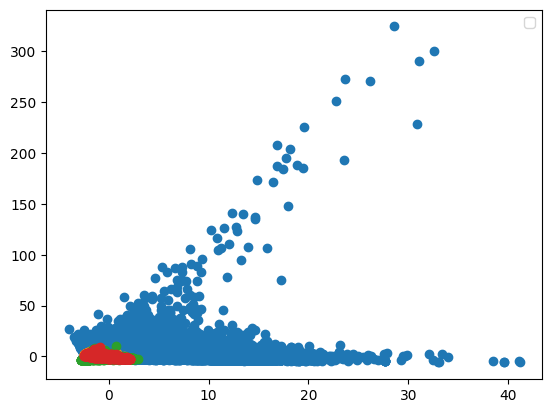

In [ ]:
kmeans_label = labels
df = X
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
import numpy as np
from fcmeans import FCM
my_model = FCM(n_clusters=4) # we use 4 cluster as an example
print(type(x))

arr = X.to_numpy()
#print(type(arr))
#print(arr)
#print(0)
my_model.fit(arr) ## X, numpy array. rows:samples columns:features
#print(1)
centers = my_model.centers
print(centers)
#print(2)
labels = my_model.predict(arr)
#print(3)
print(labels)

<class 'pandas.core.frame.DataFrame'>
[[-0.02944704 -0.01689471  0.01369708  0.0015969   0.00278451 -0.00267979
   0.00065417  0.00204039 -0.00460615 -0.00113843  0.00050404  0.00214448
   0.00203253  0.00177443 -0.00192766 -0.00107148  0.00094175]
 [ 0.11205908  0.06887197 -0.05591071 -0.00666554 -0.01179259  0.01365981
  -0.00284215 -0.0065448   0.01880895  0.00429335 -0.0025709  -0.00800672
  -0.00770733 -0.00798384  0.00938391  0.00432121 -0.00377027]
 [ 0.03911563  0.02635011 -0.02134068 -0.00267475 -0.00461219  0.00613328
  -0.00118418 -0.00193901  0.00726269  0.00155069 -0.00112452 -0.0026381
  -0.00277969 -0.00341008  0.00420899  0.00163303 -0.00140538]
 [-0.11582647 -0.07531378  0.06082411  0.00799003  0.01362535 -0.01685294
   0.00344644  0.00615715 -0.0210834  -0.00465404  0.00298391  0.00795155
   0.00833963  0.0097455  -0.0116614  -0.00466742  0.00414358]]
[3 3 3 ... 1 1 1]


[3 3 3 ... 1 1 1]


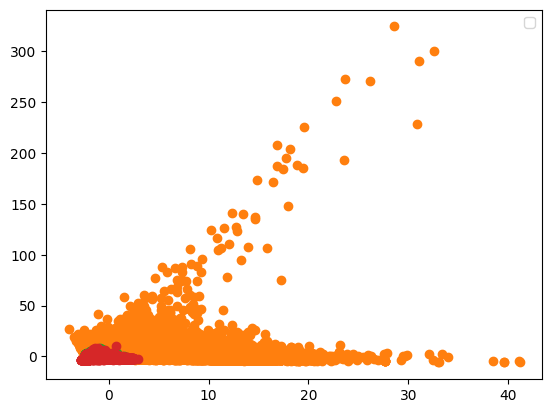

In [ ]:
fuzzy_kmeans_label = labels
df = X
print(fuzzy_kmeans_label)
u_labels = np.unique(fuzzy_kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[fuzzy_kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
## Lets find the Label Distrribution for Fuzzy K means 

In [ ]:
print(metrics.silhouette_score(X, fuzzy_kmeans_label, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X, fuzzy_kmeans_label))

DB = davies_bouldin_score(X, fuzzy_kmeans_label)
print(DB)

0.036560773390809924
18656.39080313994
8.229589940169967


In [ ]:
# Additional Analysis with the Labels
my_fuzzy_data = mydata
my_fuzzy_data['pLabel'] = fuzzy_kmeans_label

In [ ]:
## Allocate the labels back to the Data, compare on the labels between K-MEANS and Fuzzy-CMEANS
fuzzy_counter = collections.Counter(fuzzy_kmeans_label)

##>>> counter
##Counter({0: 7, 1: 4, 3: 2, 2: 1, 4: 1})
print(fuzzy_counter)

Counter({3: 275182, 1: 152934, 0: 7613, 2: 6754})


In [ ]:
label0_df_fuzzy_kmeans = my_fuzzy_data.loc[my_fuzzy_data['pLabel'] == 0]
label0_df_fuzzy_kmeans

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec,pLabel,Binary Cluster 0
44,176293152.0,49514.0,180881160.0,3128.0,6.0,4702635.0,6.0,11.0,453.0,6330.0,...,0.0,0.0,0.0,0.0,0.0,131.0,6.783000e+06,1.700000e+04,0,0
154,176294381.0,53808.0,180881160.0,3128.0,6.0,2073327.0,5.0,9.0,243.0,6330.0,...,0.0,0.0,0.0,0.0,0.0,126.0,6.573000e+06,1.400000e+04,0,0
795,180881351.0,56051.0,180879756.0,443.0,6.0,524207.0,49.0,19.0,5547.0,20405.0,...,0.0,0.0,0.0,0.0,0.0,91.0,2.595200e+07,6.800000e+04,0,0
802,180881351.0,56229.0,180879756.0,443.0,6.0,2998162.0,70.5,72.5,4242.0,153767.5,...,0.0,0.0,0.0,0.0,0.0,91.0,7.900796e+07,2.464560e+07,0,0
1246,180881369.0,37280.0,180879632.0,443.0,6.0,2795003.0,61.5,106.5,5474.0,210162.0,...,0.0,0.0,0.0,0.0,0.0,91.0,1.078217e+08,1.471703e+07,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442366,180881346.0,36017.0,137054305.0,443.0,6.0,5251133.0,10.0,7.0,2796.0,3922.0,...,0.0,0.0,0.0,0.0,0.0,91.0,6.718000e+06,1.700000e+04,0,0
442399,180881347.0,33713.0,137054305.0,443.0,6.0,14331952.0,8.0,5.0,566.0,2695.0,...,0.0,0.0,0.0,0.0,0.0,91.0,3.261000e+06,1.300000e+04,0,0
442426,180881370.0,45357.0,137054305.0,443.0,6.0,1086120.0,25.0,24.0,10870.0,11897.0,...,0.0,0.0,0.0,0.0,0.0,91.0,2.276700e+07,4.900000e+04,0,0
442440,180881347.0,37403.0,137054306.0,443.0,6.0,3788111.0,19.0,15.0,4753.0,8236.0,...,0.0,0.0,0.0,0.0,0.0,91.0,1.298900e+07,3.400000e+04,0,0


In [ ]:
label1_df_fuzzy_kmeans = my_fuzzy_data.loc[my_fuzzy_data['pLabel'] == 1]
label1_df_fuzzy_kmeans

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec,pLabel,Binary Cluster 0
48,176293755.0,0.0,180881160.0,0.0,0.0,1.114399e+08,151.000000,299.857143,0.000000,0.0,...,4.765151e+06,5.081918e+06,7.159507e+05,5.922882e+06,4.514108e+06,102.000000,0.000000e+00,4.513519e+05,1,1
119,176294381.0,53765.0,180881160.0,3128.0,6.0,2.512899e+07,2.333333,5.666667,82.333333,2476.0,...,3.333333e-01,7.565174e+06,4.952447e+06,1.296813e+07,3.241116e+06,86.333333,1.023631e+11,1.675803e+10,1,0
155,176294381.0,53809.0,180881160.0,3128.0,6.0,2.666885e+07,2.500000,8.500000,117.500000,3714.0,...,5.000000e-01,8.026546e+06,5.254593e+06,1.375981e+07,3.440028e+06,126.000000,1.476770e+09,4.289470e+06,1,0
233,180881346.0,40237.0,180879731.0,80.0,6.0,2.267868e+07,24.000000,14.000000,4212.000000,9943.0,...,1.016200e+04,8.710118e+06,0.000000e+00,8.710118e+06,8.710118e+06,7.000000,1.415500e+07,3.800000e+04,1,0
250,180881351.0,36948.0,180879731.0,80.0,6.0,1.509413e+07,44.000000,45.000000,12849.000000,40783.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000,5.363200e+07,8.900000e+04,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442478,180881370.0,54243.0,137054306.0,80.0,6.0,5.794110e+07,26.500000,40.500000,25602.500000,16093.0,...,7.408490e+05,2.705063e+07,0.000000e+00,2.705063e+07,2.705063e+07,7.000000,2.084781e+07,3.459495e+08,1,1
442479,180881370.0,54449.0,137054306.0,80.0,6.0,3.035765e+07,10.500000,14.000000,7446.000000,4189.5,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000,5.817757e+06,8.317277e+08,1,0
442480,180881370.0,54457.0,137054306.0,80.0,6.0,2.977613e+07,6.000000,6.500000,3702.000000,1735.5,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000,2.718756e+06,4.411331e+08,1,0
442481,180881370.0,56047.0,137054306.0,80.0,6.0,2.995961e+07,7.000000,9.000000,4796.000000,4254.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000,4.525014e+06,3.310524e+08,1,0


In [ ]:
label2_df_fuzzy_kmeans = my_fuzzy_data.loc[my_fuzzy_data['pLabel'] == 2]
label2_df_fuzzy_kmeans

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec,pLabel,Binary Cluster 0
222,180881346.0,45986.0,180879730.0,80.0,6.0,5142276.0,21.0,23.0,7497.0,12363.0,...,0.0,0.0,0.0,0.0,0.0,7.0,1.986000e+07,44000.000002,2,0
249,180881351.0,36869.0,180879731.0,80.0,6.0,7590090.0,37.0,30.0,8814.0,20393.0,...,0.0,0.0,0.0,0.0,0.0,7.0,2.920700e+07,67000.000000,2,0
796,180881351.0,56052.0,180879756.0,443.0,6.0,524542.0,43.0,25.0,3842.0,21116.0,...,0.0,0.0,0.0,0.0,0.0,91.0,2.495800e+07,68000.000006,2,0
884,180881346.0,42698.0,180879632.0,443.0,6.0,5000930.0,20.0,18.0,4327.0,10770.0,...,0.0,0.0,0.0,0.0,0.0,91.0,1.509700e+07,38000.000001,2,0
1298,180881369.0,43988.0,180879632.0,443.0,6.0,6546723.0,47.0,45.0,13476.0,25320.0,...,0.0,0.0,0.0,0.0,0.0,91.0,3.879600e+07,91999.999975,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442225,180881348.0,54999.0,137054260.0,443.0,6.0,8957646.0,12.0,8.0,3445.0,3539.0,...,0.0,0.0,0.0,0.0,0.0,91.0,6.984000e+06,20000.000000,2,0
442297,180881348.0,50175.0,137054270.0,443.0,6.0,562875.0,14.0,12.0,4668.0,5583.0,...,0.0,0.0,0.0,0.0,0.0,91.0,1.025100e+07,26000.000002,2,0
442358,180881346.0,51787.0,137054285.0,443.0,6.0,4885841.0,9.0,7.0,2655.0,3111.0,...,0.0,0.0,0.0,0.0,0.0,91.0,5.766000e+06,16000.000001,2,0
442369,180881346.0,36277.0,137054305.0,443.0,6.0,10467949.0,9.0,8.0,1572.0,4129.0,...,0.0,0.0,0.0,0.0,0.0,91.0,5.701000e+06,16999.999998,2,0


In [ ]:
label3_df_fuzzy_kmeans = my_fuzzy_data.loc[my_fuzzy_data['pLabel'] == 3]
label3_df_fuzzy_kmeans

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,volume_in_bytes_psec,volume_in_packets_psec,pLabel,Binary Cluster 0
0,176294558.0,51072.0,180881160.0,3128.0,6.0,14842.0,4.0,6.0,165.0,2172.0,...,0.0,0.0,0.0,0.0,0.0,131.0,2.337000e+06,1.000000e+04,3,0
1,176294591.0,49585.0,180881158.0,3128.0,6.0,7466.0,4.0,0.0,1398.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,1.398000e+06,4.000000e+03,3,0
2,176294591.0,50603.0,180881159.0,3128.0,6.0,4906.0,5.0,7.0,338.0,3554.0,...,0.0,0.0,0.0,0.0,0.0,212.0,3.892000e+06,1.200000e+04,3,0
3,176294591.0,50604.0,180881159.0,3128.0,6.0,5585.0,5.0,6.0,306.0,3169.0,...,0.0,0.0,0.0,0.0,0.0,219.0,3.475000e+06,1.100000e+04,3,0
4,176294591.0,50605.0,180881159.0,3128.0,6.0,2886.0,3.5,2.5,170.5,699.0,...,0.0,0.0,0.0,0.0,0.0,113.0,1.774782e+07,2.888500e+06,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442471,180881370.0,50101.0,137054306.0,443.0,6.0,787624.0,11.5,11.0,6186.0,6096.5,...,0.0,0.0,0.0,0.0,0.0,91.0,6.497417e+06,2.049475e+04,3,0
442472,180881370.0,50102.0,137054306.0,443.0,6.0,769796.5,12.5,11.0,4787.0,5109.0,...,0.0,0.0,0.0,0.0,0.0,91.0,5.242942e+06,2.080867e+04,3,0
442473,180881370.0,50105.0,137054306.0,443.0,6.0,1435143.0,21.0,16.0,6908.0,8420.0,...,0.0,0.0,0.0,0.0,0.0,91.0,1.532800e+07,3.700000e+04,3,0
442475,180881370.0,50190.0,137054306.0,443.0,6.0,6692992.5,13.0,10.5,6129.0,5727.0,...,0.0,0.0,0.0,0.0,0.0,91.0,5.964803e+06,9.235568e+04,3,0


In [ ]:
## We will repeat this procedure for all the Clusters. Cluster 1

my_fuzzy_data['Binary Cluster 0'] = my_fuzzy_data['pLabel'].map({0:1, 1:0, 2:0,3:0})
print("\n", my_fuzzy_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_data[mylist].values, my_fuzzy_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    434870
1      7613
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Packet.Length.Std', 0.052519413558965),
 ('Packet.Length.Variance', 0.04100268877305442),
 ('Packet.Length.Mean', 0.03288817188519876),
 ('Average.Packet.Size', 0.032877885332859874),
 ('Bwd.Packet.Length.Std', 0.027696659983712436),
 ('Max.Packet.Length', 0.02706211769992565),
 ('Flow.Duration', 0.024044180450490234),
 ('Avg.Bwd.Segment.Size', 0.023697530087145955),
 ('Bwd.Packet.Length.Mean', 0.023594372952838335),
 ('Bwd.Packet.Length.Max', 0.022660551861060377),
 ('Flow.IAT.Max', 0.02124730935711822),
 ('Fwd.IAT.Total', 0.0211034845388842),
 ('Fwd.Packet.Length.Std', 0.021028581672158646),
 ('Fwd.Packet.Length.Mean', 0.020459394195647893),
 ('Avg.Fwd.Segment.Size', 0.020036921528672046),
 ('Fwd.Packets.s', 0.019974797534640786),
 ('volume_in_bytes_psec', 0.019716368036752394),
 ('Flow.Packets.s', 0.01947021152882072),
 ('Fwd.IAT.Max', 0.019371888329908684),
 ('Flow.IAT.Std', 0.019008482049977283),
 ('Fwd.IAT.Std', 0.018682607433807168),
 ('Flow.IAT.Mean', 0.018628976309057008),


In [ ]:
## We will repeat this procedure for all the Clusters. Cluster 1

my_fuzzy_data['Binary Cluster 0'] = my_fuzzy_data['pLabel'].map({0:0, 1:1, 2:0,3:0})
print("\n", my_fuzzy_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_data[mylist].values, my_fuzzy_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    289549
1    152934
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Flow.Duration', 0.09660488470774979),
 ('Fwd.IAT.Total', 0.0920058033020527),
 ('Packet.Length.Std', 0.06556876239432695),
 ('Flow.IAT.Max', 0.06301402706239313),
 ('Max.Packet.Length', 0.05360671810729235),
 ('Packet.Length.Variance', 0.052268132373026466),
 ('Average.Packet.Size', 0.04353505466983578),
 ('Bwd.Packet.Length.Max', 0.03554765453050981),
 ('Bwd.Packet.Length.Mean', 0.03350055732921019),
 ('Flow.IAT.Std', 0.032055595696124865),
 ('Idle.Mean', 0.03194439609604618),
 ('Fwd.IAT.Max', 0.029182376832051833),
 ('Packet.Length.Mean', 0.02852726118514436),
 ('Bwd.IAT.Total', 0.02536714912618944),
 ('Idle.Max', 0.024610470948214988),
 ('Fwd.IAT.Mean', 0.021089846646036976),
 ('Active.Max', 0.020626310993934267),
 ('Fwd.IAT.Std', 0.01901609577635952),
 ('Avg.Bwd.Segment.Size', 0.017868298419384192),
 ('Idle.Min', 0.01674549819529253),
 ('Flow.IAT.Mean', 0.01429744119888126),
 ('Bwd.Packet.Length.Std', 0.013915984792259903),
 ('Flow.Packets.s', 0.009413965943987041),
 ('Fwd.Packe

In [ ]:
my_fuzzy_data['Binary Cluster 0'] = my_fuzzy_data['pLabel'].map({0:0, 1:0, 2:1,3:0})
print("\n", my_fuzzy_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_data[mylist].values, my_fuzzy_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    435729
1      6754
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Packet.Length.Std', 0.050581622188429376),
 ('Packet.Length.Variance', 0.04169168054163527),
 ('Packet.Length.Mean', 0.033253285759616245),
 ('Average.Packet.Size', 0.03226162700542643),
 ('Bwd.Packet.Length.Std', 0.02788720885641326),
 ('Max.Packet.Length', 0.026144034280551173),
 ('Avg.Bwd.Segment.Size', 0.024232979408518988),
 ('Bwd.Packet.Length.Mean', 0.023737704288956104),
 ('Bwd.Packet.Length.Max', 0.023113322908254973),
 ('Flow.Duration', 0.022644757562146133),
 ('Flow.IAT.Max', 0.02242202682779345),
 ('Fwd.IAT.Total', 0.022342149088371194),
 ('Fwd.Packet.Length.Mean', 0.021004275069633652),
 ('Fwd.Packets.s', 0.020944950438565063),
 ('Avg.Fwd.Segment.Size', 0.020158953221678707),
 ('Fwd.Packet.Length.Std', 0.02002385015400797),
 ('Flow.Packets.s', 0.019982824500140498),
 ('Flow.IAT.Std', 0.01958895667958856),
 ('Fwd.IAT.Max', 0.019415930802992178),
 ('volume_in_bytes_psec', 0.01900728372181635),
 ('Flow.IAT.Mean', 0.018716044014796845),
 ('Fwd.IAT.Mean', 0.01857617832567457

In [ ]:
my_fuzzy_data['Binary Cluster 0'] = my_fuzzy_data['pLabel'].map({0:0, 1:0, 2:0,3:1})
print("\n", my_fuzzy_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_data[mylist].values, my_fuzzy_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 1    275182
0    167301
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count',

[('Fwd.IAT.Total', 0.09384695771961316),
 ('Flow.Duration', 0.08529578539446153),
 ('Packet.Length.Std', 0.08319399160945341),
 ('Max.Packet.Length', 0.07749988896080957),
 ('Flow.IAT.Max', 0.05903131720286784),
 ('Packet.Length.Variance', 0.04649342230732681),
 ('Average.Packet.Size', 0.0461944761130282),
 ('Bwd.Packet.Length.Max', 0.039630857565667206),
 ('Idle.Max', 0.03240000613581506),
 ('Idle.Mean', 0.02989700831873519),
 ('Flow.IAT.Std', 0.029823273603556473),
 ('Fwd.IAT.Max', 0.028386355072480694),
 ('Bwd.Packet.Length.Mean', 0.028059167779321856),
 ('Packet.Length.Mean', 0.02782622447807128),
 ('Bwd.Packet.Length.Std', 0.021641088057481963),
 ('Bwd.IAT.Total', 0.018932258471957522),
 ('Active.Max', 0.016155141979930468),
 ('Fwd.IAT.Std', 0.015404147441626315),
 ('Flow.IAT.Mean', 0.015160970057999566),
 ('Fwd.IAT.Mean', 0.013309347315503494),
 ('Avg.Bwd.Segment.Size', 0.010952929078591675),
 ('Total.Length.of.Bwd.Packets', 0.010048873726948413),
 ('Flow.Packets.s', 0.0083535039

In [ ]:
## Fuzzy C Means with reduced data sets
## Use Standard Scaler to Scale the Data
newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(newmydata_bytes)) #scaling the data
X1=scaled_data


import numpy as np
from fcmeans import FCM
my_model = FCM(n_clusters=4) # we use 4 cluster as an example
print(type(x))

arr = X1.to_numpy()
#print(type(arr))
#print(arr)
#print(0)
my_model.fit(arr) ## X, numpy array. rows:samples columns:features
#print(1)
centers = my_model.centers
print(centers)
#print(2)
labels = my_model.predict(arr)
#print(3)
print(labels)

<class 'pandas.core.frame.DataFrame'>
[[-0.84211906  1.19321593  0.35116466 -0.7334553  -0.0382498  -0.11205219
  -0.3078402 ]
 [-0.75568761 -0.00755792 -0.7891721  -0.71543712 -0.01936886 -0.04632015
  -0.20079257]
 [ 0.82501437 -0.73316854  0.3281533   0.708116    0.01571424  0.05707835
   1.62128244]
 [ 1.10120782 -0.86477194  0.20987632  0.88297321 -0.03067736 -0.09373184
  -0.42186716]]
[3 1 3 ... 1 1 1]


[2 2 2 ... 0 0 0]


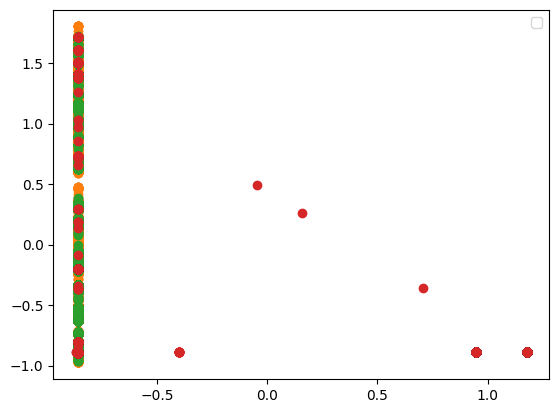

In [ ]:
fuzzy_kmeans_label = labels
df = X1
print(kmeans_label)
u_labels = np.unique(fuzzy_kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[fuzzy_kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
print(metrics.silhouette_score(X1, fuzzy_kmeans_label, metric = 'euclidean',sample_size=50000))
print(metrics.calinski_harabasz_score(X1, fuzzy_kmeans_label))

DB = davies_bouldin_score(X1, fuzzy_kmeans_label)
print(DB)

0.41170710640892916
124733.17733442172
1.2688507633630808


In [ ]:
# Additional Analysis with the Labels
my_fuzzy_reduced_data = newmydata_bytes
my_fuzzy_reduced_data['pLabel'] = fuzzy_kmeans_label
## Allocate the labels back to the Data, compare on the labels between K-MEANS and Fuzzy-CMEANS
fuzzy_counter = collections.Counter(fuzzy_kmeans_label)

##>>> counter
##Counter({0: 7, 1: 4, 3: 2, 2: 1, 4: 1})
print(fuzzy_counter)

Counter({3: 157714, 0: 146711, 1: 85683, 2: 52375})


In [ ]:
## We will repeat this procedure for all the Clusters. Cluster 0

my_fuzzy_reduced_data['Binary Cluster 0'] = my_fuzzy_reduced_data['pLabel'].map({0:1, 1:0, 2:0,3:0})
print("\n", my_fuzzy_reduced_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_reduced_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_reduced_data[mylist].values, my_fuzzy_reduced_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    295772
1    146711
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']


[('Destination.IP', 0.4637569558375603),
 ('L7Protocol', 0.20581614188412056),
 ('Destination.Port', 0.17096312050962525),
 ('Source.IP', 0.08896380748158605),
 ('Flow.Duration', 0.0492585862142308),
 ('volume_in_packets_psec', 0.011446982383513724),
 ('volume_in_bytes_psec', 0.009794405689363336)]

In [ ]:
## We will repeat this procedure for all the Clusters. Cluster 1

my_fuzzy_reduced_data['Binary Cluster 0'] = my_fuzzy_reduced_data['pLabel'].map({0:0, 1:1, 2:0,3:0})
print("\n", my_fuzzy_reduced_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_reduced_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_reduced_data[mylist].values, my_fuzzy_reduced_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    356800
1     85683
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']


[('L7Protocol', 0.3564938822438174),
 ('Destination.IP', 0.3211097570347309),
 ('Destination.Port', 0.1510459925937155),
 ('Source.IP', 0.09025276558147909),
 ('Flow.Duration', 0.04323991005897794),
 ('volume_in_bytes_psec', 0.026244468671512686),
 ('volume_in_packets_psec', 0.011613223815766602)]

In [ ]:
## We will repeat this procedure for all the Clusters. Cluster 1

my_fuzzy_reduced_data['Binary Cluster 0'] = my_fuzzy_reduced_data['pLabel'].map({0:0, 1:0, 2:1,3:0})
print("\n", my_fuzzy_reduced_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_reduced_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_reduced_data[mylist].values, my_fuzzy_reduced_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    390108
1     52375
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']


[('Flow.Duration', 0.7065468521164499),
 ('Destination.IP', 0.07179148549260811),
 ('Destination.Port', 0.05556103344284604),
 ('volume_in_bytes_psec', 0.04553381935419765),
 ('Source.IP', 0.04504006898065298),
 ('L7Protocol', 0.041325968092392536),
 ('volume_in_packets_psec', 0.03420077252085291)]

In [ ]:
my_fuzzy_reduced_data['Binary Cluster 0'] = my_fuzzy_reduced_data['pLabel'].map({0:0, 1:0, 2:1,3:1})
print("\n", my_fuzzy_reduced_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(my_fuzzy_reduced_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(my_fuzzy_reduced_data[mylist].values, my_fuzzy_reduced_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    232394
1    210089
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']


[('Destination.Port', 0.37135685749610836),
 ('Destination.IP', 0.2749358882992057),
 ('Source.IP', 0.2336240027112799),
 ('Flow.Duration', 0.06342190949286709),
 ('L7Protocol', 0.034853129975577865),
 ('volume_in_bytes_psec', 0.013998956350903263),
 ('volume_in_packets_psec', 0.007809255674057816)]

## DB Scan
## Wherever we have taken 20000 etc is because of memory limitation , will change after moving to collab

In [ ]:
from sklearn.cluster import DBSCAN
#db=DBSCAN(eps=30,min_samples=6)

db = DBSCAN(eps=5,min_samples=5)
X1 = X.head(20000)
db.fit(X1)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
dbscan_labels = len(labels)
dbscan_label_vals = labels

print('overall elements : %d' % len(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X.head(20000), labels))

overall elements : 20000
Estimated number of clusters: 9
Estimated number of noise points: 222
Silhouette Coefficient: 0.143


9 is too high. Will try the hyperparameters more

In [ ]:


print("herabasz",metrics.calinski_harabasz_score(X1, labels))

DB = davies_bouldin_score(X1, labels)
print("Davies-build-in",DB)

herabasz 252.00979678753143
Davies-build-in 1.271643095832339


[0 0 0 ... 0 0 0]


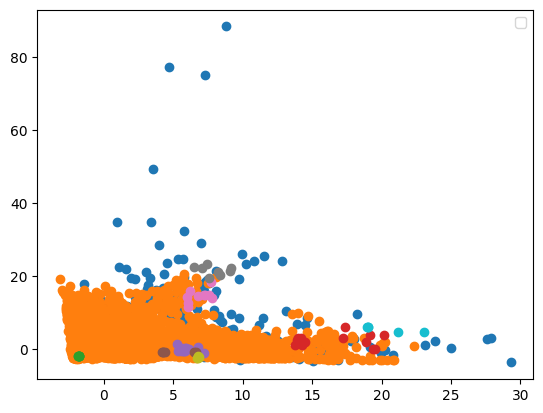

In [ ]:
kmeans_label = labels
df = X1
print(kmeans_label)
u_labels = np.unique(kmeans_label)
 
#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[kmeans_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
#db=DBSCAN(eps=30,min_samples=6)

db = DBSCAN(eps=5,min_samples=10)
X1 = X.head(20000)
db.fit(X1)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X.head(20000), labels))

Estimated number of clusters: 3
Estimated number of noise points: 328
Silhouette Coefficient: 0.639


3 is OK. Our analysis will be done based on 3 Clusters

In [ ]:

#print("Silhouette:",metrics.silhouette_score(X1, labels, metric = 'euclidean',sample_size=50000))
print("herabasz",metrics.calinski_harabasz_score(X1, labels))

DB = davies_bouldin_score(X1, labels)
print("Davies-build-in",DB)

herabasz 626.8336926779328
Davies-build-in 1.4989476966762865


In [ ]:
u_labels = np.unique(labels) 
u_labels



array([-1,  0,  1,  2])

In [ ]:
dbscan_counter = collections.Counter(labels)
print(dbscan_counter)

Counter({0: 19646, -1: 328, 1: 16, 2: 10})


[0 0 0 ... 0 0 0]


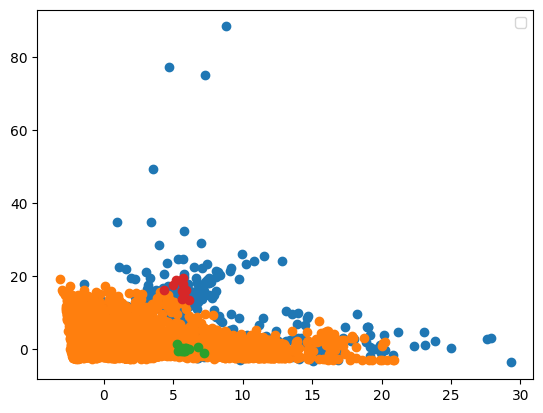

In [ ]:
dbscan_label = labels
df = X1
print(dbscan_label)
u_labels = np.unique(dbscan_label) 



dbscan_labels = len(labels)
dbscan_label_vals = labels

#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[dbscan_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
print(u_labels)

[-1  0  1  2]


In [ ]:
dbscan_data = mydata.head(20000)
dbscan_data['pLabel'] = dbscan_label_vals
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:1, 0:0, 1:0, 2:0})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))


 0    19672
1      328
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', '

<ipython-input-128-6ce7c20a048d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['pLabel'] = dbscan_label_vals
<ipython-input-128-6ce7c20a048d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:1, 0:0, 1:0, 2:0})


[('Active.Max', 0.06655007314723924),
 ('Active.Std', 0.045772367786298764),
 ('Active.Mean', 0.040775948551254146),
 ('Bwd.Packet.Length.Min', 0.02859389445218524),
 ('Fwd.Header.Length.1', 0.02853466189280973),
 ('Active.Min', 0.026556408518113563),
 ('Bwd.IAT.Mean', 0.025077013396349917),
 ('Total.Fwd.Packets', 0.025076144069564307),
 ('Fwd.Packet.Length.Min', 0.02268101996913626),
 ('Bwd.Header.Length', 0.022030643361242847),
 ('Flow.Duration', 0.021449807146434942),
 ('Fwd.Packet.Length.Mean', 0.020973652562959844),
 ('Subflow.Bwd.Packets', 0.020781541114843215),
 ('Bwd.IAT.Max', 0.02034020044702833),
 ('Subflow.Fwd.Packets', 0.019623184864719145),
 ('Fwd.IAT.Mean', 0.019448617448251725),
 ('Flow.IAT.Mean', 0.01932640683452982),
 ('Bwd.IAT.Total', 0.019174219110757357),
 ('Idle.Max', 0.018205337198052198),
 ('Fwd.Header.Length', 0.016208417289446782),
 ('Idle.Min', 0.015545586477168277),
 ('Bwd.IAT.Std', 0.015532386711802506),
 ('Avg.Fwd.Segment.Size', 0.015477814072774777),
 ('Fw

In [ ]:
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:1, 1:0, 2:0})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

<ipython-input-129-aabc3aa58017>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:1, 1:0, 2:0})



 1    19646
0      354
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', '

[('Active.Max', 0.0736880746633836),
 ('Active.Mean', 0.04296290033598107),
 ('Active.Std', 0.037406108417218004),
 ('Flow.IAT.Mean', 0.033472150929762204),
 ('Fwd.Header.Length.1', 0.030823991598341455),
 ('Active.Min', 0.029553192009620855),
 ('Fwd.Packet.Length.Min', 0.029261563650395107),
 ('Bwd.Packet.Length.Min', 0.02710790034235278),
 ('Fwd.Packet.Length.Mean', 0.02218413710744418),
 ('Bwd.IAT.Mean', 0.021848547933128605),
 ('Total.Fwd.Packets', 0.021839213017882192),
 ('Bwd.Header.Length', 0.021627002061998746),
 ('Bwd.IAT.Total', 0.021037664099210103),
 ('Subflow.Fwd.Packets', 0.02103748207590337),
 ('Subflow.Bwd.Packets', 0.019879213463922334),
 ('Fwd.Header.Length', 0.019231698417413432),
 ('Bwd.IAT.Max', 0.019151542607596946),
 ('Idle.Max', 0.018885153230990572),
 ('Min.Packet.Length', 0.018805034151972558),
 ('Fwd.IAT.Mean', 0.017517217444161022),
 ('Total.Backward.Packets', 0.017204696406445025),
 ('Flow.Duration', 0.01677460453766953),
 ('Fwd.IAT.Total', 0.01483043118436

In [ ]:
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:0, 1:1, 2:1})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

<ipython-input-130-aa62dc0ba0e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:0, 1:1, 2:1})



 0    19974
1       26
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', '

[('Flow.IAT.Min', 0.1022347939477366),
 ('Fwd.IAT.Min', 0.08384516943437269),
 ('Active.Max', 0.07351048265667678),
 ('Min.Packet.Length', 0.06385365783980426),
 ('Active.Min', 0.05743994694013303),
 ('Active.Mean', 0.05654974318623479),
 ('Flow.IAT.Mean', 0.044346280479268245),
 ('Fwd.IAT.Mean', 0.03430103391766608),
 ('Destination.Port', 0.02696866632406592),
 ('Fwd.Packet.Length.Min', 0.019913143476648958),
 ('Bwd.IAT.Mean', 0.01710315828932096),
 ('Flow.IAT.Std', 0.015793741689548745),
 ('Idle.Mean', 0.015279381662995094),
 ('Subflow.Bwd.Packets', 0.014853462395558702),
 ('Fwd.IAT.Std', 0.014629423388477272),
 ('Idle.Min', 0.014575923404068016),
 ('Flow.Duration', 0.013888612256042604),
 ('Bwd.IAT.Std', 0.013220848919243237),
 ('Flow.Packets.s', 0.01262096908584696),
 ('Bwd.IAT.Max', 0.0115099255691955),
 ('Subflow.Fwd.Packets', 0.011416658408638859),
 ('Fwd.Header.Length.1', 0.0105593519219302),
 ('Bwd.Packet.Length.Std', 0.009909434629838086),
 ('SYN.Flag.Count', 0.00969068475884

In [ ]:
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:0, 1:0, 2:1})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

<ipython-input-131-5e2ba37c3b85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0,0:0, 1:0, 2:1})



 0    19990
1       10
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', '

[('Active.Max', 0.14071226978465043),
 ('Active.Mean', 0.07464205140277658),
 ('Active.Min', 0.07292895648297477),
 ('Fwd.Header.Length', 0.031025454665675474),
 ('Init_Win_bytes_backward', 0.024933336833360905),
 ('Total.Backward.Packets', 0.021005865517276238),
 ('Bwd.IAT.Mean', 0.019216684387176275),
 ('Init_Win_bytes_forward', 0.018892185506686636),
 ('Flow.Bytes.s', 0.018141675401282465),
 ('Avg.Bwd.Segment.Size', 0.017903857620956504),
 ('Flow.IAT.Mean', 0.017861622193315642),
 ('Fwd.Packet.Length.Mean', 0.017783571169454),
 ('Bwd.IAT.Std', 0.017716550992444728),
 ('Fwd.Header.Length.1', 0.01734057298749833),
 ('Subflow.Fwd.Packets', 0.016951716573076668),
 ('Max.Packet.Length', 0.016638236008845217),
 ('Packet.Length.Std', 0.01649131868792397),
 ('Avg.Fwd.Segment.Size', 0.016370093483647725),
 ('Subflow.Bwd.Packets', 0.016364533989021594),
 ('Flow.Duration', 0.016283548989007073),
 ('Active.Std', 0.01459253444910971),
 ('Bwd.IAT.Max', 0.014464419859101168),
 ('Total.Length.of.Fw

In [ ]:
### DB Scan with reduced data sets
from sklearn.cluster import DBSCAN
#db=DBSCAN(eps=30,min_samples=6)

## Use Standard Scaler to Scale the Data
newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(newmydata_bytes)) #scaling the data
X1=scaled_data

db = DBSCAN(eps=5,min_samples=10)

db.fit(X1.head(20000))


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X1.head(20000), labels))


Estimated number of clusters: 1
Estimated number of noise points: 5
Silhouette Coefficient: 0.805


In [ ]:
dbscan_counter = collections.Counter(labels)
print(dbscan_counter)

Counter({0: 19995, -1: 5})


[0 0 0 ... 0 0 0]


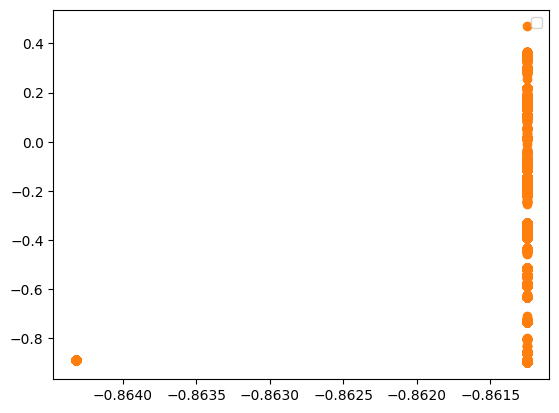

In [ ]:
dbscan_label = labels
df = X1.head(20000)
print(dbscan_label)
u_labels = np.unique(dbscan_label) 



dbscan_labels = len(labels)
dbscan_label_vals = labels

#plotting the results:
 
for i in u_labels:
    filtered_label0 = df[dbscan_label == i]
    plt.scatter(filtered_label0.iloc[:,0].values , filtered_label0.iloc[:,1].values)
    #kmeans_label=i
plt.legend()
plt.show()

In [ ]:
newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()

dbscan_data = newmydata_bytes.head(20000)
dbscan_data['pLabel'] = dbscan_label_vals
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:1, 0:0, 1:0, 2:0})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

<ipython-input-135-48f67edef45b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['pLabel'] = dbscan_label_vals
<ipython-input-135-48f67edef45b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:1, 0:0, 1:0, 2:0})



 0    19995
1        5
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']


[('Destination.Port', 0.5961856002852898),
 ('volume_in_bytes_psec', 0.23789981153735537),
 ('Flow.Duration', 0.07091648823536939),
 ('volume_in_packets_psec', 0.048108709081232465),
 ('Destination.IP', 0.03965045093342779),
 ('L7Protocol', 0.007237315242061001),
 ('Source.IP', 1.6246852642704695e-06)]

In [ ]:
newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()

dbscan_data = newmydata_bytes.head(20000)
dbscan_data['pLabel'] = dbscan_label_vals
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0, 0:1, 1:0, 2:0})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

<ipython-input-136-73884bd5bd1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['pLabel'] = dbscan_label_vals
<ipython-input-136-73884bd5bd1a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0, 0:1, 1:0, 2:0})



 1    19995
0        5
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']


[('Destination.Port', 0.5961856002852898),
 ('volume_in_bytes_psec', 0.23789981153735537),
 ('Flow.Duration', 0.07091648823536939),
 ('volume_in_packets_psec', 0.048108709081232465),
 ('Destination.IP', 0.03965045093342779),
 ('L7Protocol', 0.007237315242061001),
 ('Source.IP', 1.6246852642704695e-06)]

In [ ]:
newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()

dbscan_data = newmydata_bytes.head(20000)
dbscan_data['pLabel'] = dbscan_label_vals
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0, 0:0, 1:1, 2:0})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

<ipython-input-137-7707cbe28454>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['pLabel'] = dbscan_label_vals
<ipython-input-137-7707cbe28454>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0, 0:0, 1:1, 2:0})



 0    20000
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']


[('Flow.Duration', 0.0),
 ('volume_in_packets_psec', 0.0),
 ('volume_in_bytes_psec', 0.0),
 ('Destination.Port', 0.0),
 ('L7Protocol', 0.0),
 ('Destination.IP', 0.0),
 ('Source.IP', 0.0)]

In [ ]:
newmydata_bytes = mydata[['Source.IP', 'Destination.IP','L7Protocol', 'Destination.Port','volume_in_bytes_psec','volume_in_packets_psec','Flow.Duration']].copy()

dbscan_data = newmydata_bytes.head(20000)
dbscan_data['pLabel'] = dbscan_label_vals
dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0, 0:0, 1:0, 2:1})
print("\n", dbscan_data["Binary Cluster 0"].value_counts())

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

mylist = list(dbscan_data.columns)


mylist.remove('Binary Cluster 0')


print(mylist)

mylist.remove('pLabel')

clf.fit(dbscan_data[mylist].values, dbscan_data["Binary Cluster 0"].values)

sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

most_important_features = np.take_along_axis(
   np.array(mylist),
   sorted_feature_weight_idxes, axis=0)

most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights))

<ipython-input-138-16822c0b8812>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['pLabel'] = dbscan_label_vals
<ipython-input-138-16822c0b8812>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbscan_data['Binary Cluster 0'] = dbscan_data['pLabel'].map({-1:0, 0:0, 1:0, 2:1})



 0    20000
Name: Binary Cluster 0, dtype: int64
['Source.IP', 'Destination.IP', 'L7Protocol', 'Destination.Port', 'volume_in_bytes_psec', 'volume_in_packets_psec', 'Flow.Duration', 'pLabel']


[('Flow.Duration', 0.0),
 ('volume_in_packets_psec', 0.0),
 ('volume_in_bytes_psec', 0.0),
 ('Destination.Port', 0.0),
 ('L7Protocol', 0.0),
 ('Destination.IP', 0.0),
 ('Source.IP', 0.0)]